<a href="https://colab.research.google.com/github/JapiKredi/Pinnacle_AI_program_AnalyticsVidyha/blob/main/Bivariate_Analysis_Cat_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Reading Files into Python

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing data
data = pd.read_csv('/content/drive/My Drive/Bivariate_analysis_Cat_Cat/churn_prediction.csv')

In [4]:
#first 5 observations using "head()" function
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [5]:
#last 5 observations using "tail()" function
data.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT
28381,30301,1175,18,Male,0.0,student,1232.0,2,474,2107.05,...,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,2019-11-02


In [6]:
#finding out the shape of the data using "shape" method: Output (rows, columns)
data.shape

(28382, 21)

In [7]:
#Printing all the columns present in data
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

## Variable Identification and Typecasting

In [8]:
# A closer look at the data types present in the data
data.dtypes

,0
customer_id,int64
vintage,int64
age,int64
gender,object
dependents,float64
occupation,object
city,float64
customer_nw_category,int64
branch_code,int64
current_balance,float64


There are a lot of variables visible at one, so let's narrow this down by looking **at one datatype at once**. We will start with int


### Integer Data Type

In [9]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

,0
customer_id,int64
vintage,int64
age,int64
customer_nw_category,int64
branch_code,int64
churn,int64


Summary:

*    **Customer id** are a unique number assigned to customers. It is are **Okay as Integer**.

*    **branch code** represents different branches, therefore it should be **convereted to category**.

*    **Age** and **Vintage** are also numbers and hence we are okay with them as integers.

*    **customer_networth_category** is supposed to be an ordinal category, **should be converted to category**.

*    **churn** : 1 represents the churn and 0 represents not churn. However, there is no comparison between these two categories. This **needs to be converted to category datatype**.


In [10]:
# converting to category data type
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes == 'int64']

,0
customer_id,int64
vintage,int64
age,int64


### Float Data Type

In [11]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

,0
dependents,float64
city,float64
current_balance,float64
previous_month_end_balance,float64
average_monthly_balance_prevQ,float64
average_monthly_balance_prevQ2,float64
current_month_credit,float64
previous_month_credit,float64
current_month_debit,float64
previous_month_debit,float64


Summary:

*    **dependents** is expected to be a whole number. **Should be changed to integer type**

*    **city** variable is also a unique code of a city represented by some interger number. **Should be converted to Category type**

*    Rest of the variables like **credit, balance and debit** are best represented by the float variables.

In [12]:
# converting "dependents" and "city" to their respective types
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

# checking
data[['dependents','city']].dtypes

,0
dependents,Int64
city,category


### Object Data Type

In [13]:
data.dtypes

,0
customer_id,int64
vintage,int64
age,int64
gender,object
dependents,Int64
occupation,object
city,category
customer_nw_category,category
branch_code,category
current_balance,float64


*    **variables like 'gender', 'occupation' and 'last_transaction' are of type object**. This means that **Pandas was not able to recognise the datatype** of these three variables.

In [14]:
# Manually checking object types
data[['gender','occupation','last_transaction']].head(7)

,gender,occupation,last_transaction
0,Male,self_employed,2019-05-21
1,Male,self_employed,2019-11-01
2,Male,salaried,NaT
3,NaN,self_employed,2019-08-06
4,Male,self_employed,2019-11-03
5,Female,self_employed,2019-11-01
6,Male,retired,2019-09-24


*    **gender** and **occupation** variables **belong to categorical data types**.
*    **last_transaction** should be a  **datetime variable**.

In [15]:
# typecasting "gender" and "occupation" to category type
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

# checking
data[['gender','occupation']].dtypes

,0
gender,category
occupation,category


### datetime Data Type

In [16]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(data['last_transaction'])

In [17]:
# extracting new features from "last_transaction"

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
# data['woy_ls_tran'] = date.weekofyear
# weekofyear method is deprecated, so using strftime method.
# Refer https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
data['woy_ls_tran'] = date.strftime('%V').astype('float')

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

In [18]:
# checking new extracted columns using datetime
data[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,2019-05-21,141.0,21.0,5.0,1.0
1,2019-11-01,305.0,44.0,11.0,4.0
2,NaT,NaN,NaN,NaN,NaN
3,2019-08-06,218.0,32.0,8.0,1.0
4,2019-11-03,307.0,44.0,11.0,6.0


The first column is the complete date of the last transaction which was done by the any given customer.

The next columns represent the day of year, week of year, month of year, day of week when the last transaction was done.

**Breaking down the date variable** into these granular information will **help us in understand when the last transaction was done from different perspectives**. Now that we have extracted the essentials from the last_transaction variables, we will drop it from the dataset.



In [19]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

,0
customer_id,int64
vintage,int64
age,int64
gender,category
dependents,Int64
occupation,category
city,category
customer_nw_category,category
branch_code,category
current_balance,float64


## Univariate Analysis: Numerical Variables

In [20]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

,0
customer_id,int64
vintage,int64
age,int64
dependents,Int64
current_balance,float64
previous_month_end_balance,float64
average_monthly_balance_prevQ,float64
average_monthly_balance_prevQ2,float64
current_month_credit,float64
previous_month_credit,float64


In [21]:
# segregating variables into groups
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [22]:
# custom function for easy and efficient analysis of numerical variables

def UVA_numeric(data, var_group):
    '''
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i-th variable and plot/print it
    '''

    size = len(var_group)
    plt.figure(figsize = (7*size,4), dpi = 100)

    #looping for each variable
    for j,i in enumerate(var_group):

    # calculating descriptives of a variable
        mini = round(data[i].min(), 2)
        maxi = round(data[i].max(), 2)
        ran = round(data[i].max() - data[i].min(), 2)
        mean = round(data[i].mean(), 2)
        median = round(data[i].median(), 2)
        st_dev = round(data[i].std(), 2)
        skew = round(data[i].skew(), 2)
        kurt = round(data[i].kurtosis(), 2)

        # calculating points for range of data within one standard deviation from mean
        points = round(mean-st_dev, 2), round(mean+st_dev, 2)

        #Plotting the variable with every information, can change marker size in scatterplot(i.e. s=60)
        plt.subplot(1,size,j+1)
        sns.kdeplot(x=data[i], fill=True)
        sns.lineplot(x=points, y=[0,0], color = 'black', label = "within 1 std_dev")
        sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = f"min&max={mini}&{maxi}")
        sns.scatterplot(x=[mean], y=[0], color = 'red', label = f"mean={mean}")
        sns.scatterplot(x=[median], y=[0], color = 'blue', label = f"median={median}")
        plt.xlabel(f'{i}', fontsize = 20)
        plt.ylabel('density')
        plt.title(f'within 1 std_dev={points[0]} to {points[1]};kurtosis={kurt};\n skew = {skew};range = {ran}')

### customer_information

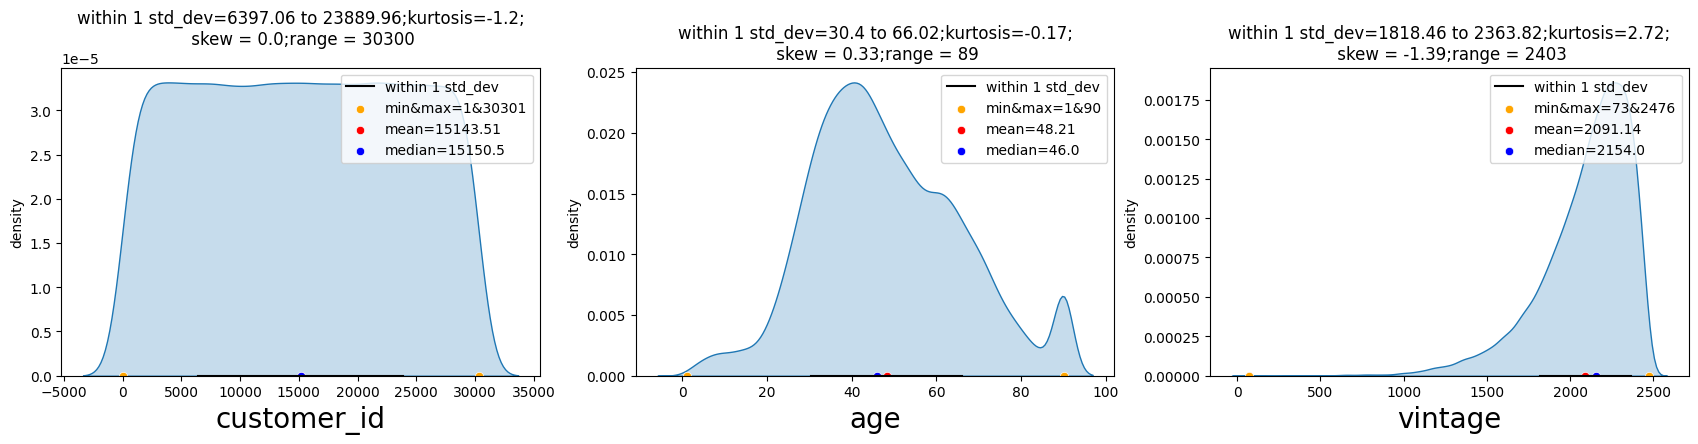

In [23]:
UVA_numeric(data,customer_details)

**Summary of Customer_Information:**
*    **customer_id**:
     *    variable is **unique for every customer, Hence uniform** distribution.
     * This variable **does not contribute any information**
     * Can be eliminated from data

*    **age**:
    *    Median Age = 46
    *    **Most customers age between 30 to 66**
    *    skewness +0.33 : customer age is **negligibly biased towards younger age**
    *    **kurtosis = -0.17**; very less likely to have extreme/outlier values.
*    **vintage:**
    *    Most customers joined between 1818 and 2364 days from the day of data extraction.
    *    **skewness** -1.39 : this is left skewed, **vintage variable is significantly biased towards longer association of customers.**
    *    **Kurtosis = 2.72**: Extreme values and Outliers are very likely to be present in vintage.

**Things to Investigate Further down the road:**
*    The batch of **high number of very Old Age customers** in age variable.

### current_month

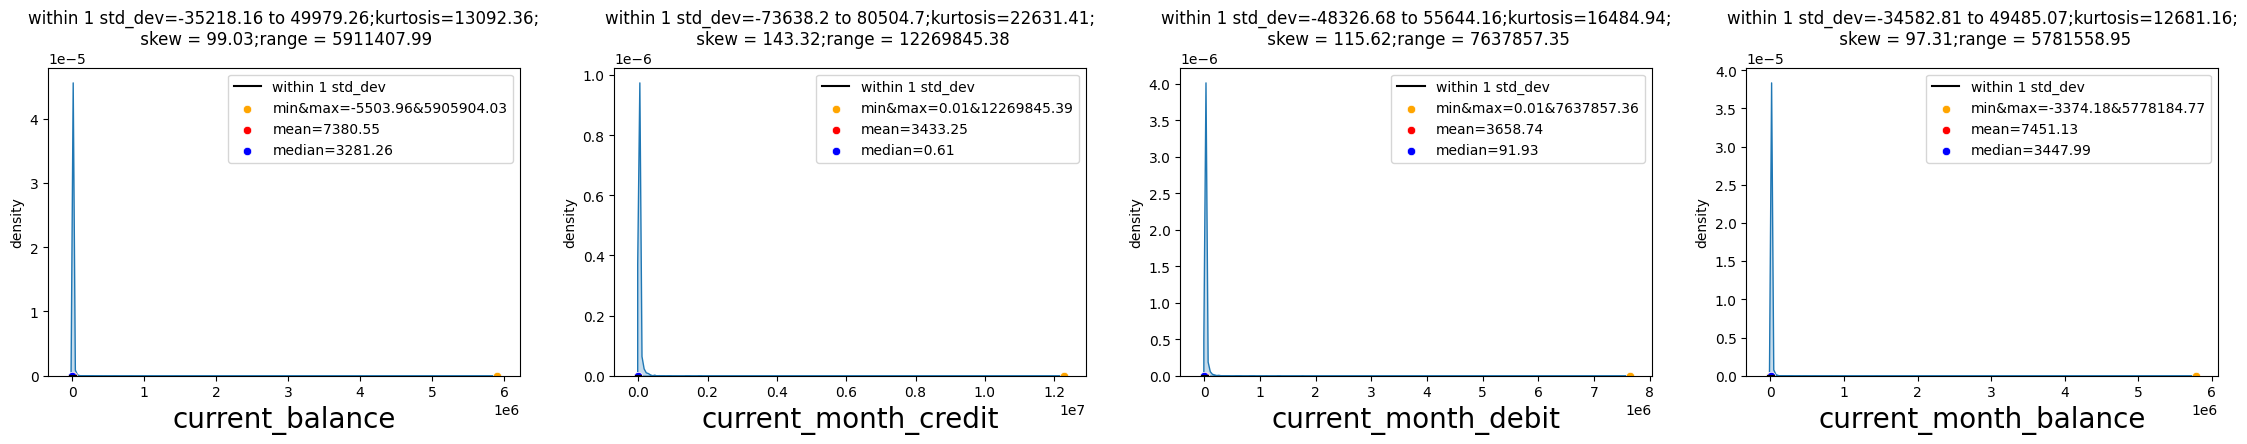

In [24]:
UVA_numeric(data,current_month)

**Summary**
*    Considering the kurtosis and skewness value  for all 4 of these plots. Outliers/Extreme values are obvious.


**Need to Remove Outliers to visulaise these plots**

In [25]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = data[current_month]

# filtering using standard deviation (not considering observations > mean + factor*standard deviation)
cm_data = cm_data[cm_data['current_balance'] < cm_data['current_balance'].mean() + factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < cm_data['current_month_credit'].mean() + factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < cm_data['current_month_debit'].mean() + factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < cm_data['current_month_balance'].mean() + factor*cm_data['current_month_balance'].std()]

# checking how many points removed
len(data), len(cm_data)

(28382, 27425)

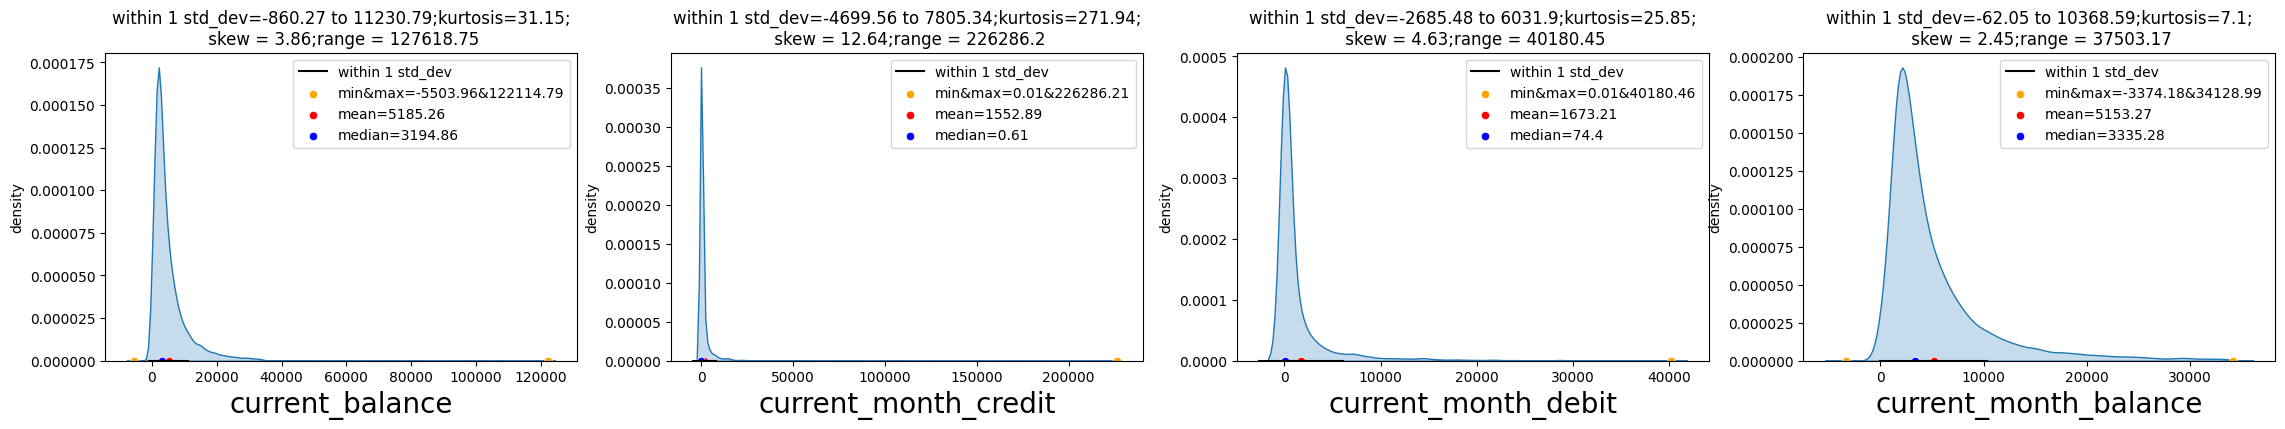

In [26]:
UVA_numeric(cm_data,current_month)

**Summary of current_month**
*    After Removing extreme/outliers, plots are still very skewed.

**Things to investigate further down**
1.    **Is there thete any common trait/relation between the customers who are performing high transaction credit/debits?**
2.    **Customers who are performinng high amount of transactions, are they doinng it every month?**

### previous_month

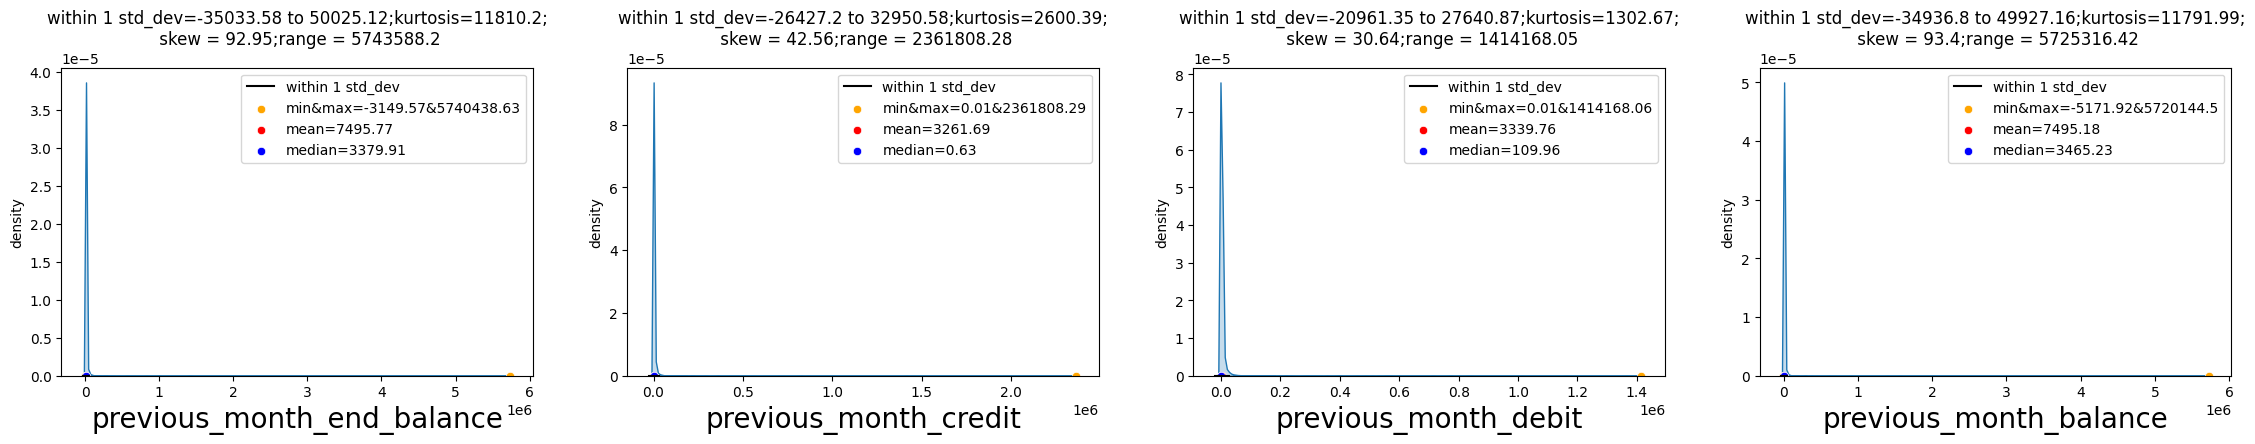

In [27]:
UVA_numeric(data,previous_month)

**Summary of previous_month**
*    This looks very similar to current_month. Most of the customers perform low amount transactions.

### previous_quarters

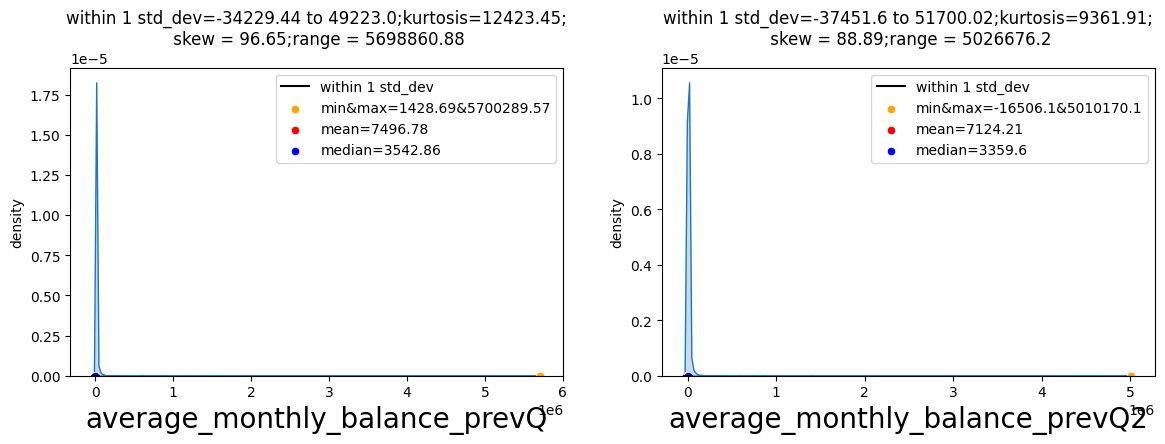

In [28]:
UVA_numeric(data,previous_quarters)

**Summary**
The general trend still follows, it is crutial that we find the out if there is any common trait between the customers doing high high amount of transactions.

### transaction_date

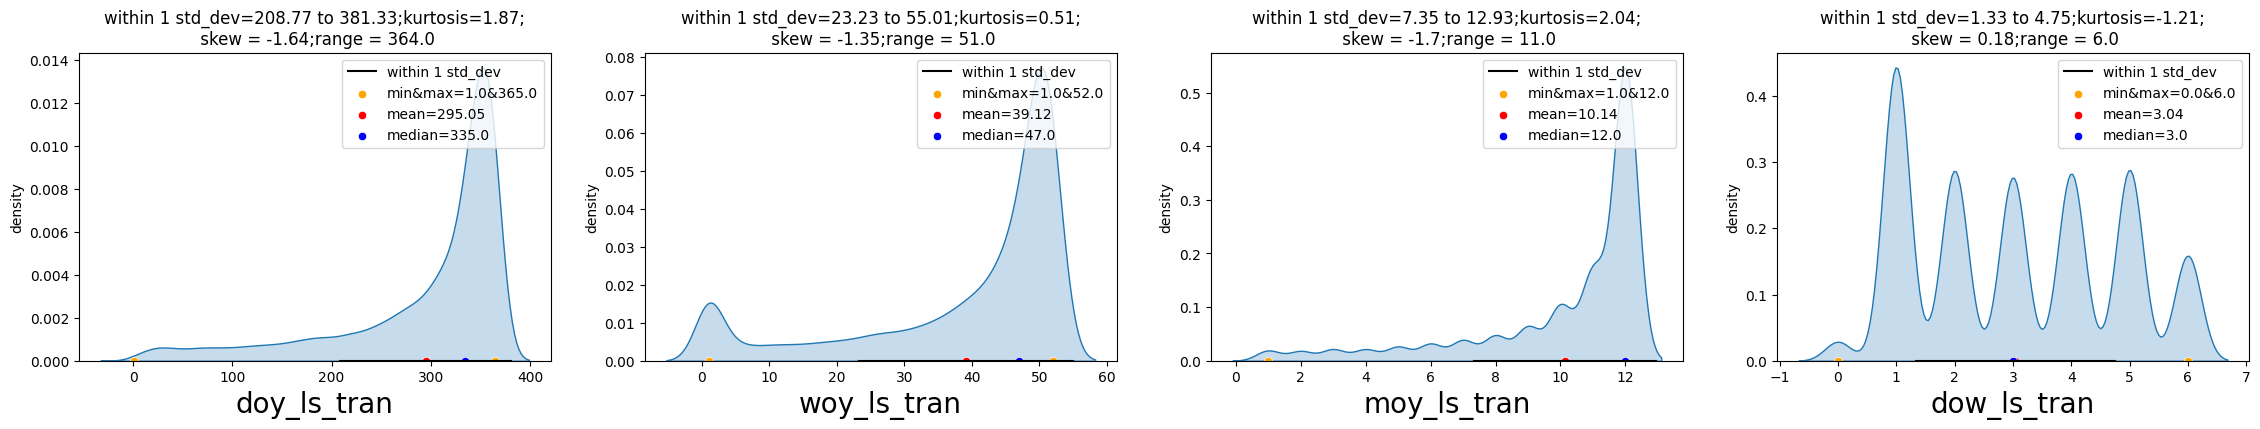

In [29]:
UVA_numeric(data,transaction_date)

**Summary**
*    **Day_of_Year**:
    *    most of the last transactions were made in the last 60 days of the extraction of data.
    *    There are transactions which were made also an year ago.

*   **Week_of_year and Month_of_year**: these variable validate the findings from the **day_of_year**.
*    **Day_of_Week**: Tuesdays are often the favoured day relative to others.

**Things to investigate further Down**
*    **Customers whose last transaction was 6 months ago, did all of them churn?**

## Univariate Analysis : Categorical Varibales

In [30]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

,0
gender,category
occupation,category
city,category
customer_nw_category,category
branch_code,category
churn,category


**Grouping Varibales**

* **customer_info**: gender, occupation, customer_nw_category
* **account_info**: city, branch_code
* **churn**

In [31]:
def UVA_category(data, var_group, max_categories=10):

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print the value_counts and barplot for max_categories.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi=100)

    # for every variable
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)[:max_categories]
        n_uni = data[i].nunique()

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.barplot(x=norm_count, y=norm_count.index , order=norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel(f'{i}', fontsize = 20)
        plt.title(f'n_uniques = {n_uni} \n value counts \n {norm_count}')

### customer_info

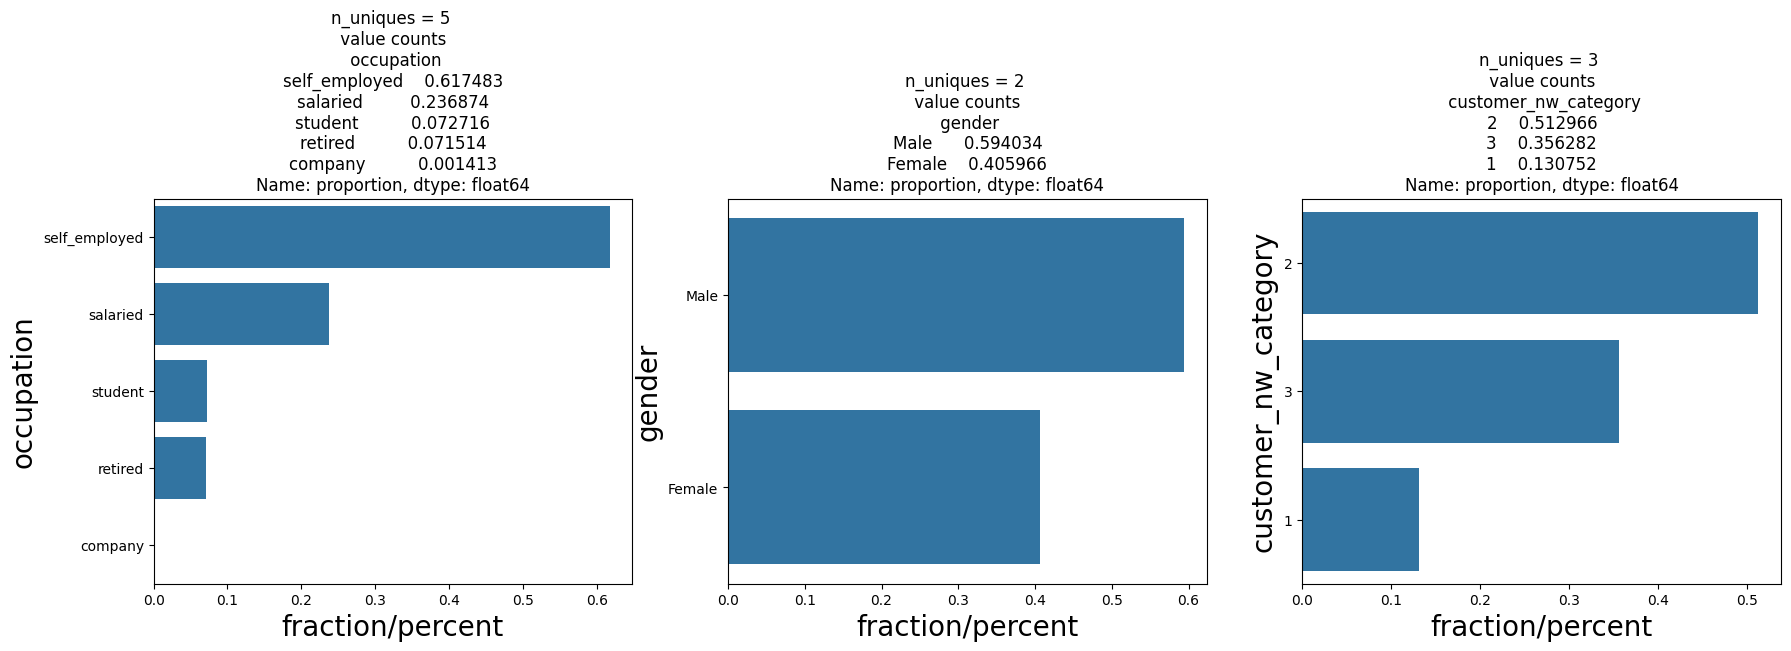

In [32]:
UVA_category(data, ['occupation', 'gender', 'customer_nw_category'])

**Summary**
* Occupation
  * Majority of people are self_employed.
  * There are extremely few Company Accounts. Might explain Outlier/Extreme values in credit/debit.

* Gender:
  *  Males accounts are 1.5 times more than Female Accounts.

* customer_nw_category:
  *  Half of all the accounts belong to the 3rd net worth category.
  *  Less than 15% belong to the highest net worth category.

**Things to investigate further down:**
* Possibility: Company accounts are the reason behind the outlier transactions.
* Possibility: customers belonging to the highest net worth category may explain the skewness of the transactions.

### account_info

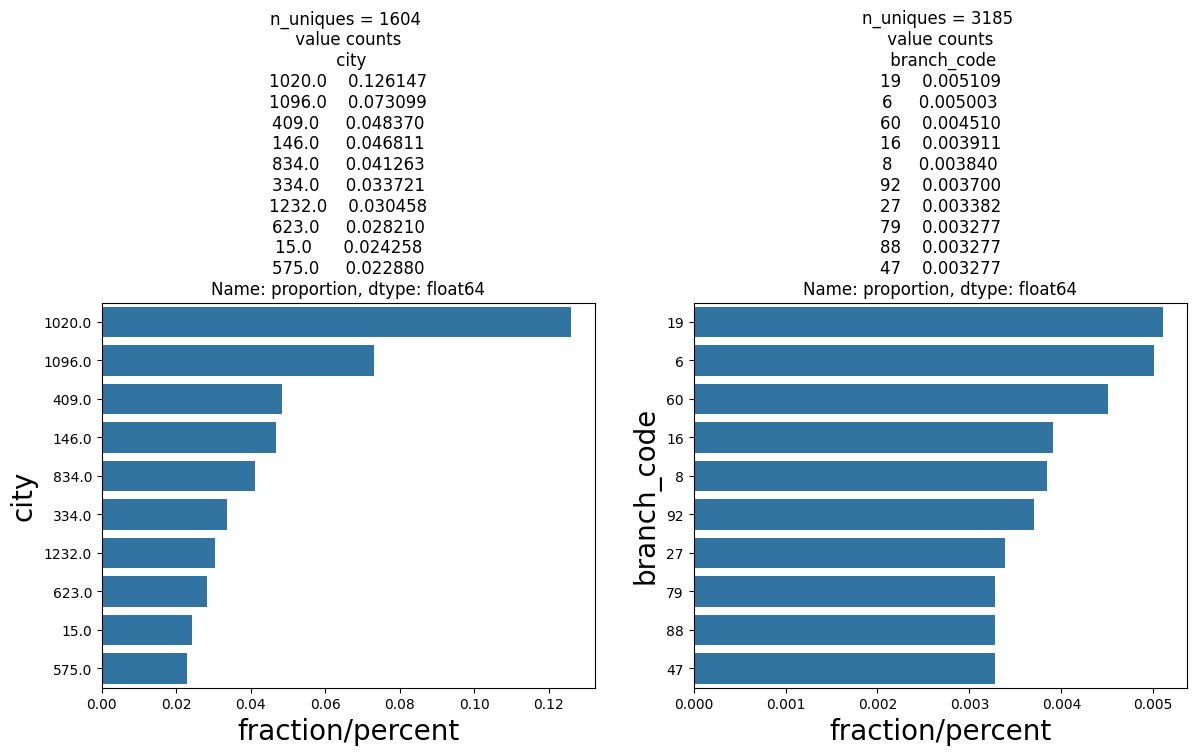

In [33]:
UVA_category(data, ['city', 'branch_code'])

Text(0, 0.5, 'fraction/percent')

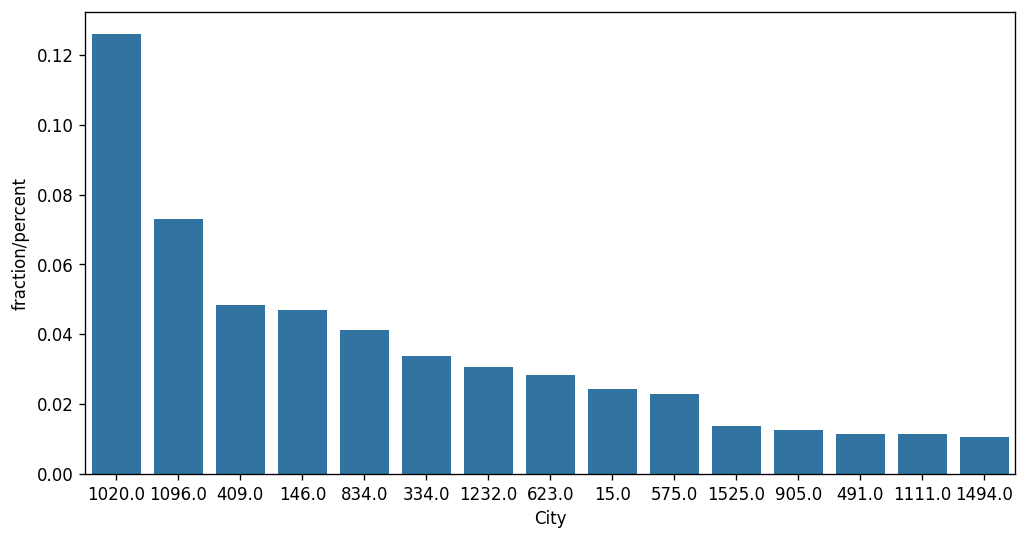

In [34]:
#Plotting "city" for top 15 cities
plt.figure(figsize = (10,5), dpi = 120)
city_count = data['city'].value_counts(normalize=True)[:15]
sns.barplot(x=city_count.index, y=city_count , order = city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')

Text(0, 0.5, 'fraction/percent')

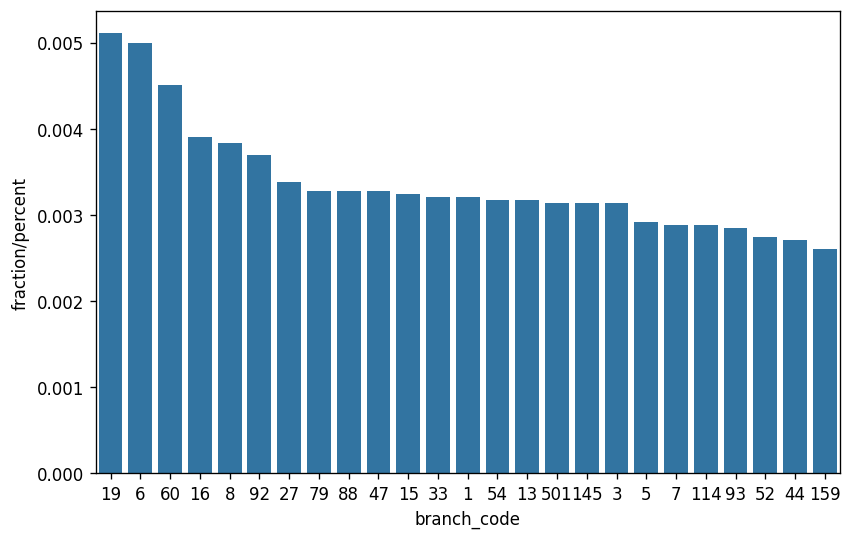

In [35]:
#Plotting "branch_code" for top 25 cities
plt.figure(figsize=(8,5), dpi=120)
branch_count = data['branch_code'].value_counts(normalize=True)[:25]
sns.barplot(x=branch_count.index, y=branch_count , order=branch_count.index)
plt.xlabel('branch_code')
plt.ylabel('fraction/percent')

**Summary:**
for both variable "city" and "branch_code", there are too many categories. There is clear relation that some branches and cities are more popular with customers and and this trend decreases rapidly.

**Things to investigate further Down**
* Popular cities and branch code might be able to explain the skewness and outliers of credit/debit variables.
* Possibility that cities and branch code with very few accounts may lead to churning.

### churn

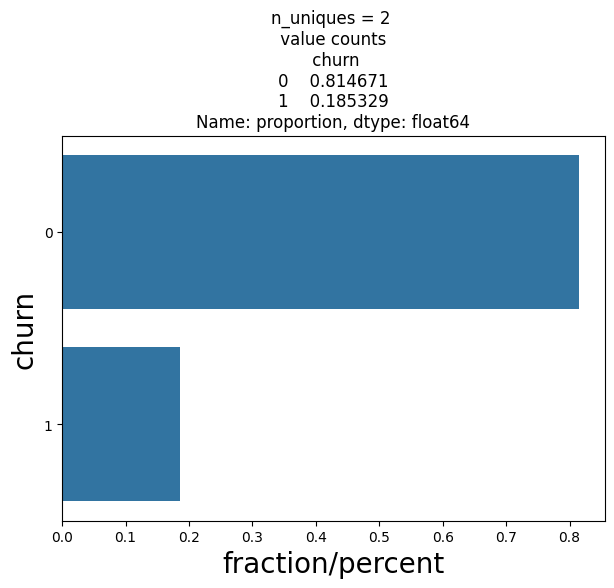

In [36]:
UVA_category(data, ['churn'])

**Summary**
* Number of people who churned are 1/4 times of the people who did not churn in the given data.

## Univariate: Missing Values

In [37]:
# finding number of missing values in every variable
data.isnull().sum()

,0
customer_id,0
vintage,0
age,0
gender,525
dependents,2463
occupation,80
city,803
customer_nw_category,0
branch_code,0
current_balance,0


**Things to investigate further down:**
*    Gender: Do the customers with missing gender values have some common behaviour in-
  * churn: do missing values have any relation with churn?

* Dependents:
 * Missing values might be similar to zero dependents
 * churn: do missing values have any relation with churn?

* Occupation:
 * Do missing values have similar behaviour to any other occupation
 * do they have some relation with churn?

* city:
  * the respective cities can be found using branch_code

* last_transaction:
  * checking their previous month and current month and previous_quarter activity might give insight on their last transaction.

* For almost all the above:

  * vintage: might be recording errors from same period of joining
  * branch_code: might be recording error from certain branch


## Univariate Analysis: Outliers

**We suspected outliers in current_month and previous_month variable groups. We will verify that using bo plots**

In [38]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
    '''
    Univariate_Analysis_outlier:
    takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives
    Runs a loop: calculate all the descriptives of i-th variable and plot/print it

    data : dataframe from which to plot from
    var_group : [list] Group of Continuous variables
    include_outlier : [bool] whether to include outliers or not, default = True
    '''

    size = len(var_group)
    plt.figure(figsize = (7*size,4), dpi = 100)

    #looping for each variable
    for j,i in enumerate(var_group):

        # calculating descriptives of variable
        quant25 = round(data[i].quantile(0.25), 2)
        quant75 = round(data[i].quantile(0.75), 2)
        IQR = round(quant75 - quant25, 2)
        med = round(data[i].median(), 2)
        whis_low = quant25-(1.5*IQR)
        whis_high = quant75+(1.5*IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i]>whis_high])
        outlier_low = len(data[i][data[i]<whis_low])

        if include_outlier == True:
            #Plotting the variable with every information
            plt.subplot(1,size,j+1)
            sns.boxplot(data=data[i], orient="v")
            plt.ylabel(f'{i}')
            plt.title(f'With Outliers\nIQR = {IQR}; Median = {med}\n 1st,3rd quartile = {quant25, quant75};\n Outliers(low/high) = {(outlier_low,outlier_high)}')

        else:
            # replacing outliers with max/min whisker
            data2 = data[var_group][:]
            data2[i][data2[i]>whis_high] = whis_high+1
            data2[i][data2[i]<whis_low] = whis_low-1

            # plotting without outliers
            plt.subplot(1,size,j+1)
            sns.boxplot(data=data2[i], orient="v")
            plt.ylabel(f'{i}')
            plt.title(f'With Outliers\nIQR = {IQR}; Median = {med}\n 1st,3rd quartile = {quant25, quant75}')

### current_month and previous_month

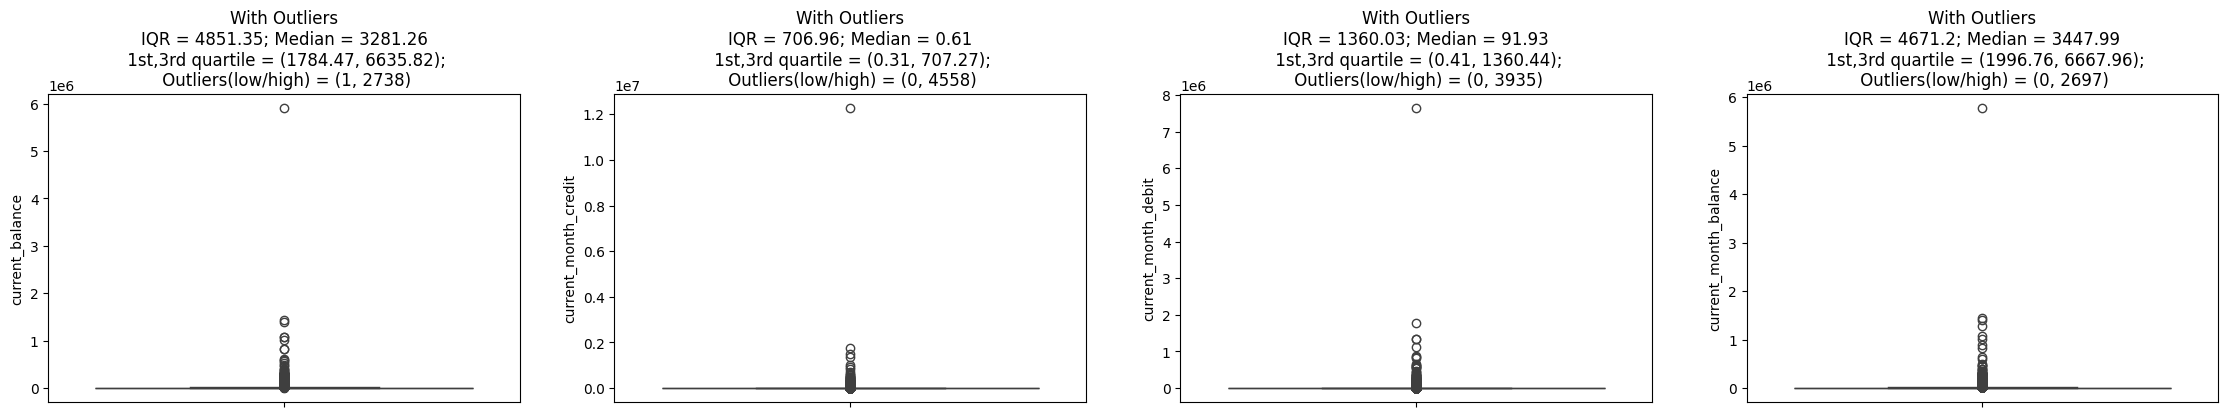

In [39]:
UVA_outlier(data, current_month,)

<ipython-input-38-f0f8d621e8e7>:42: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data2[i][data2[i]>whis_high] = whis_high+1
<ipython-input-38-f0f8d621e8e7>:43: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You 

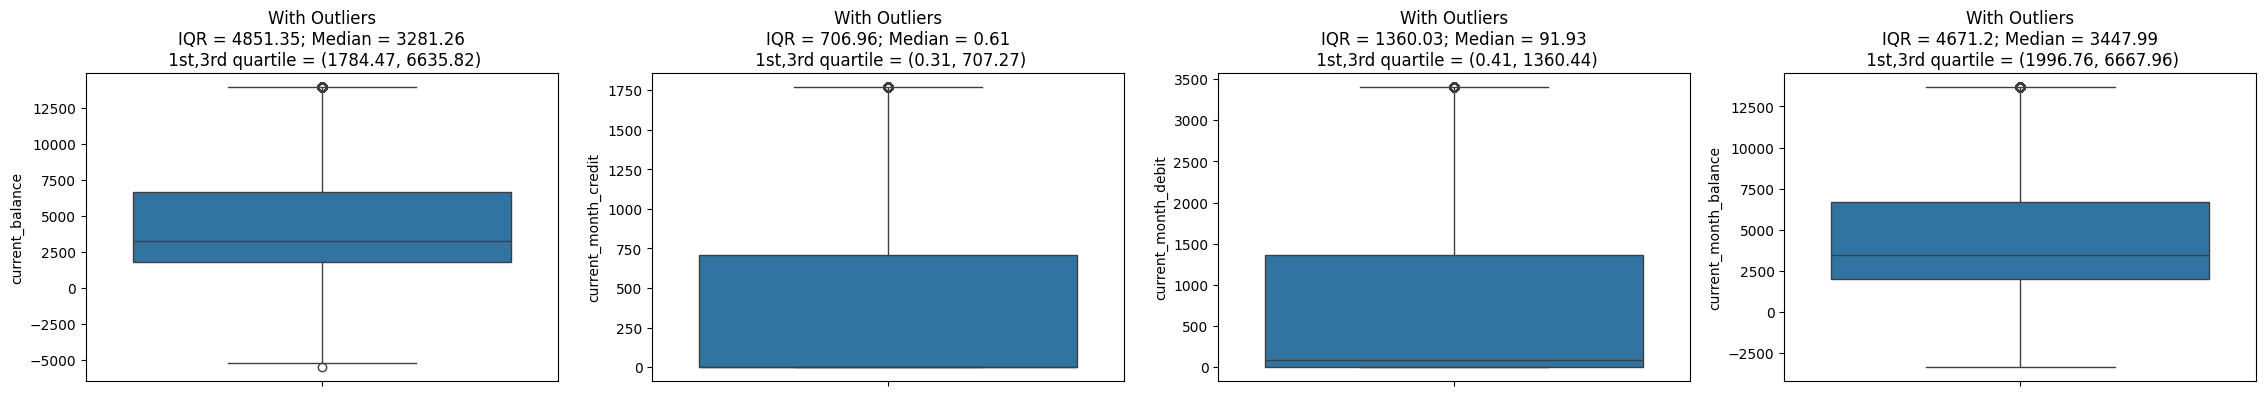

In [40]:
UVA_outlier(data, current_month, include_outlier=False)

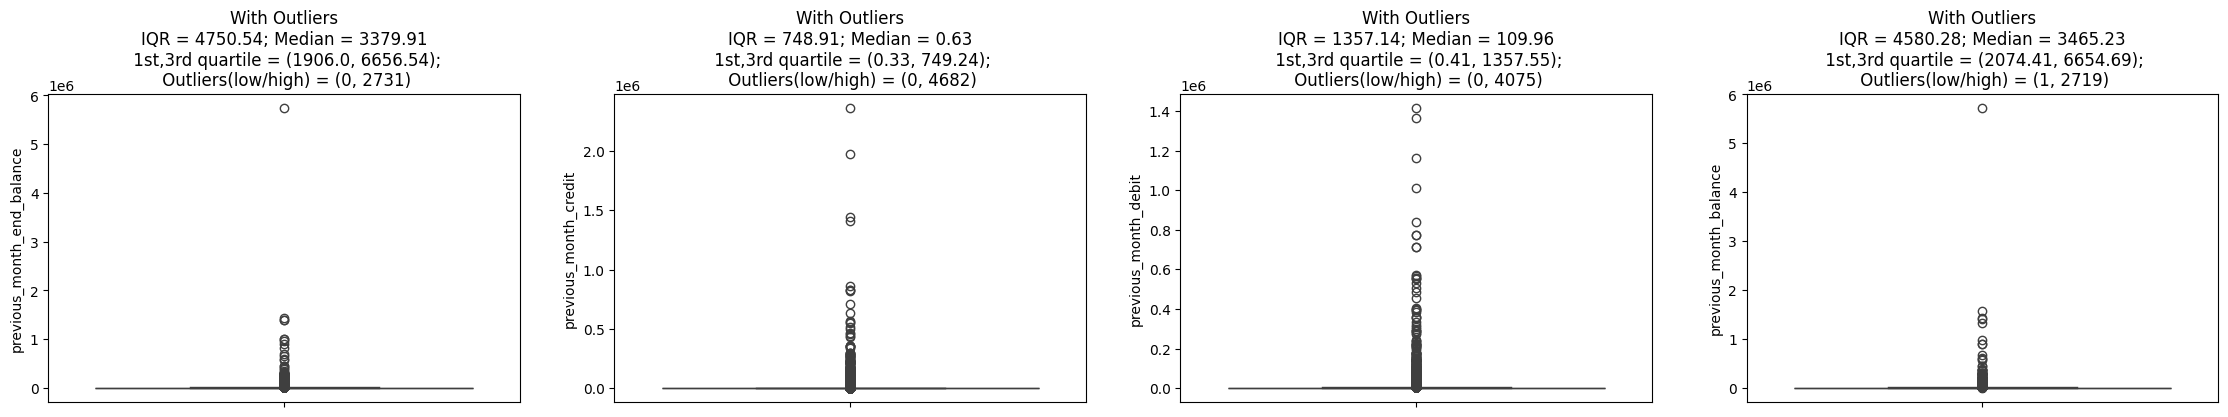

In [43]:
UVA_outlier(data, previous_month)

<ipython-input-38-f0f8d621e8e7>:42: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data2[i][data2[i]>whis_high] = whis_high+1
<ipython-input-38-f0f8d621e8e7>:43: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You 

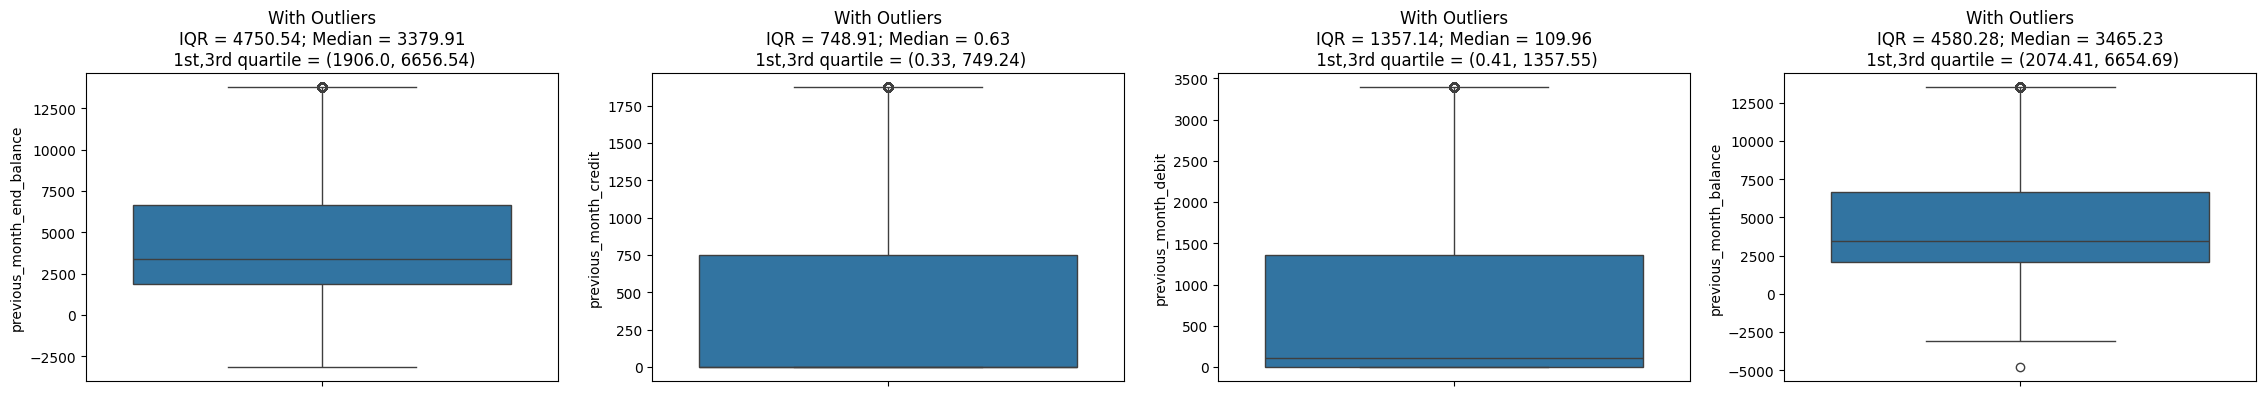

In [42]:
UVA_outlier(data, previous_month, include_outlier=False)

**Summary:**
* If we look at corresponding plots in the outputs above, there seems to be a strong relation between the corresponding plots of previous_month and current_month variables.

* Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of Outliers.

### previous quarters

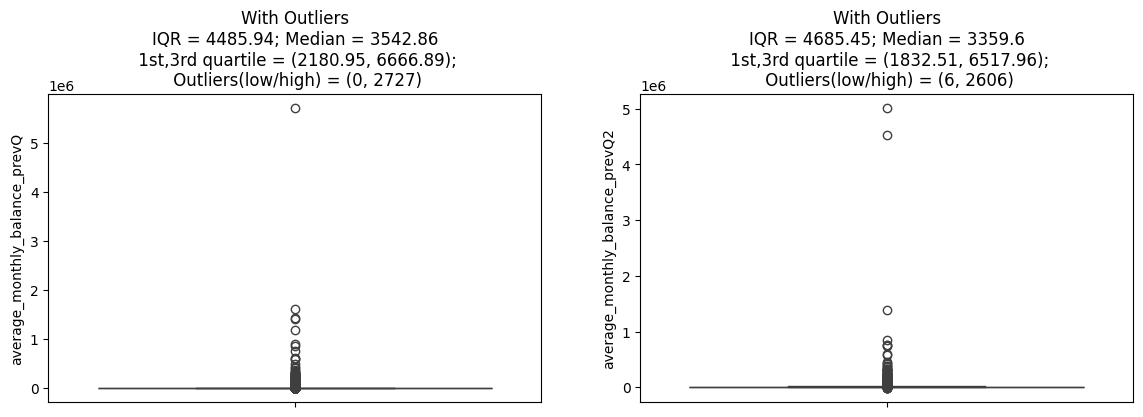

In [41]:
UVA_outlier(data,previous_quarters)

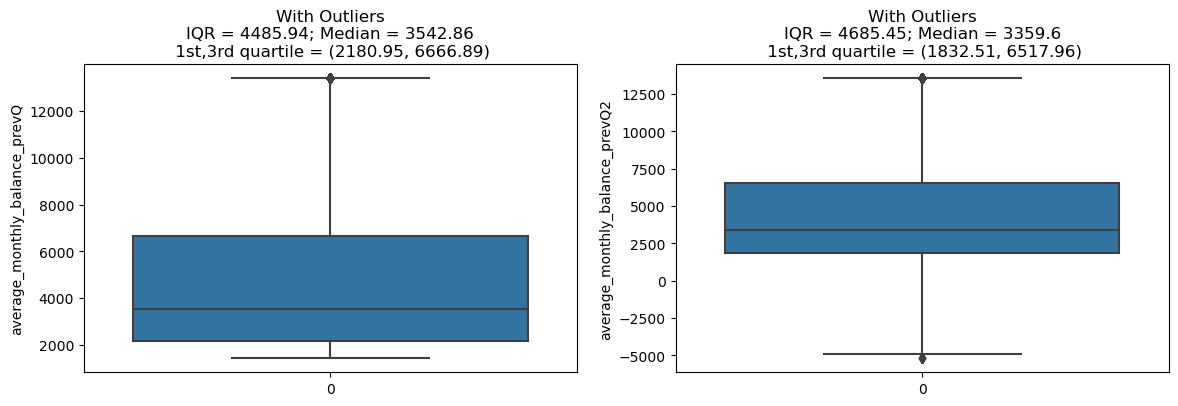

In [ ]:
UVA_outlier(data,previous_quarters, include_outlier = False)

Summary:
* Outliers in previous two quarters are very similar but significantly large in number.

## Investigation directions from Univariate Analysis
1. customer_id variable can be dropped.
2.  Is there there any common trait/relation between the customers who are performing high transaction credit/debits?
   * customer_nw_category might explain that.
   * Occupation = Company might explain them
   * popular cities might explain this
4.  Customers whose last transaction was 6 months ago, did all of them churn?
5. Possibility that cities and branch code with very few accounts may lead to churning.


## Bivariate Analysis : Numerical-Numerical

In [44]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

,0
customer_id,int64
vintage,int64
age,int64
dependents,Int64
current_balance,float64
previous_month_end_balance,float64
average_monthly_balance_prevQ,float64
average_monthly_balance_prevQ2,float64
current_month_credit,float64
previous_month_credit,float64


### Correlation Matrix

In [45]:
# calculating correlation
correlation = numerical.corr()
correlation

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
customer_id,1.000000,-0.007750,-0.000442,-0.008616,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.010550,0.007208,-0.009882,0.008990
vintage,-0.007750,1.000000,0.006220,0.005192,0.000031,-0.000669,-0.002054,-0.001759,-0.004617,-0.000169,-0.004978,-0.006760,-0.000550,-0.002208,-0.004435,-0.012589,-0.005372,-0.008596
age,-0.000442,0.006220,1.000000,-0.000612,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,0.016642,0.003852,0.017257,-0.017958
dependents,-0.008616,0.005192,-0.000612,1.000000,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.079740,0.034460,0.077978,-0.001702
current_balance,0.006589,0.000031,0.054346,-0.003070,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,0.019978,-0.000374,0.019094,0.003441
previous_month_end_balance,0.005819,-0.000669,0.058342,0.000216,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.014381,0.003973,0.014125,0.004301
average_monthly_balance_prevQ,0.004485,-0.002054,0.061708,0.001213,0.958307,0.970530,1.000000,0.763495,0.033639,0.085699,0.060579,0.121272,0.976290,0.994038,0.012688,0.002552,0.012721,0.003469
average_monthly_balance_prevQ2,-0.002532,-0.001759,0.059607,0.002949,0.714600,0.722998,0.763495,1.000000,0.036271,0.062264,0.045239,0.102519,0.725826,0.736635,0.006363,-0.012678,0.005499,-0.002391
current_month_credit,0.002494,-0.004617,0.023840,0.003260,0.030371,0.032493,0.033639,0.036271,1.000000,0.168561,0.937021,0.135729,0.034182,0.038254,0.033129,0.010479,0.031521,0.000947
previous_month_credit,-0.006414,-0.000169,0.029961,0.025054,0.061754,0.114222,0.085699,0.062264,0.168561,1.000000,0.165092,0.733953,0.085320,0.108496,0.071645,0.019146,0.068229,-0.007766


### Heatmap

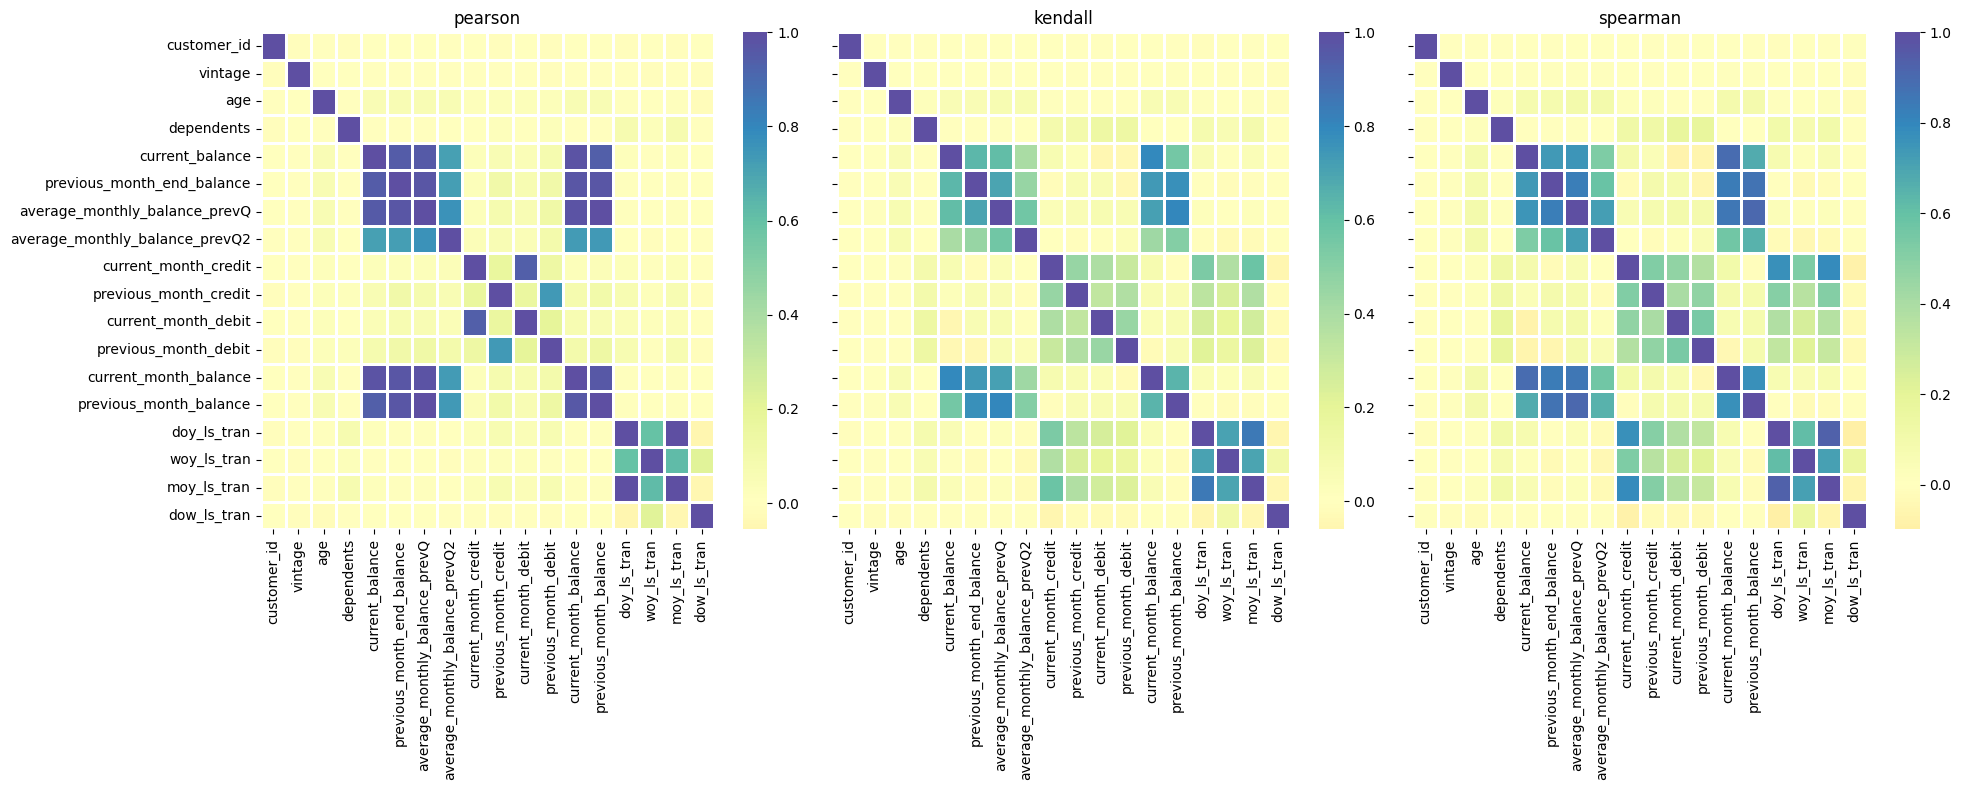

In [46]:
# plotting heatmap using all methods for all numerical variables
correlations = ['pearson','kendall','spearman']
fig, axes = plt.subplots(1, 3, figsize=(20,8), sharey='all')
for i, ax in enumerate(axes.ravel()):
    sns.heatmap(numerical.corr(method=correlations[i]), linewidths=2, cmap='Spectral', center=0, ax=ax)
    axes[i].set_title(correlations[i])
plt.tight_layout()

* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the transaction variables and balance variables.

In [47]:
# extracting transaction information of current and previous months
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

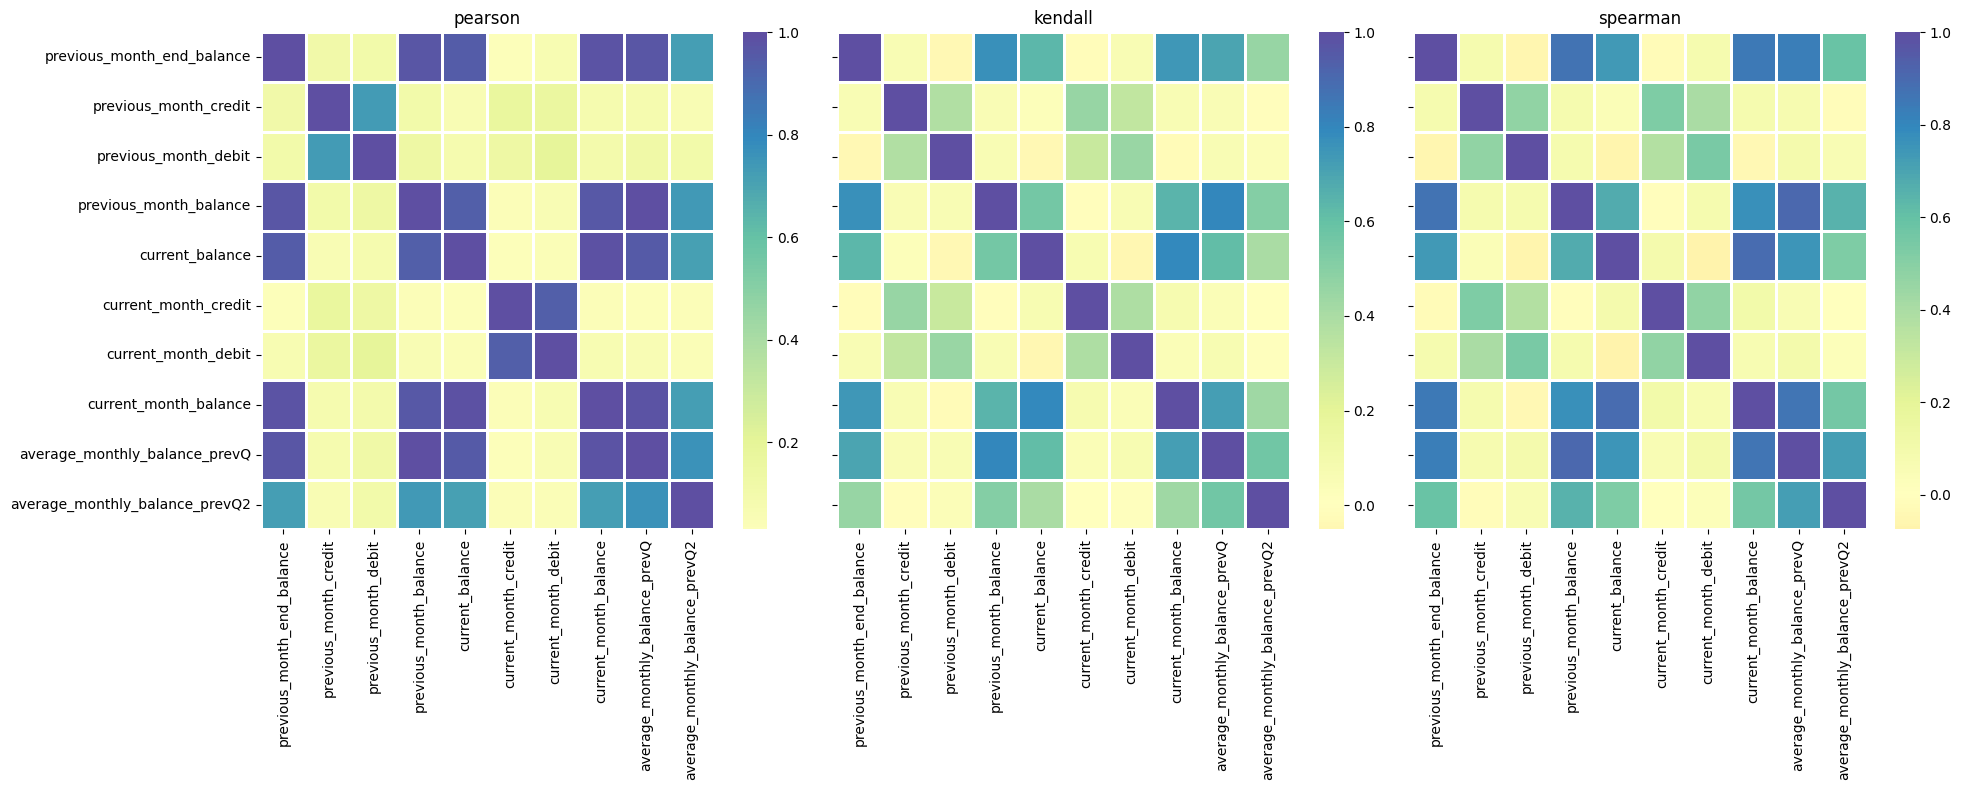

In [48]:
# plotting heatmap using all methods for all numerical variables
corrs = ['pearson','kendall','spearman']
fig, axes = plt.subplots(1, 3, figsize=(20,8), sharex='all', sharey='all')
for i, ax in enumerate(axes.ravel()):
    sns.heatmap(numerical[var].corr(method=corrs[i]), linewidths=2, cmap='Spectral', center=0, ax=ax)
    axes[i].set_title(corrs[i])
plt.tight_layout()

**Inferences:**


1.   Transaction variables like credit/debit have a strong correlation among themselves.
2.  Balance variables have strong correlation among themselves.
3.   Transaction variables like credit/debit have insignificant or no correlation with the Balance variables.



### Scatterplot

In [49]:
# Grouping variables
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

<Figure size 640x480 with 0 Axes>

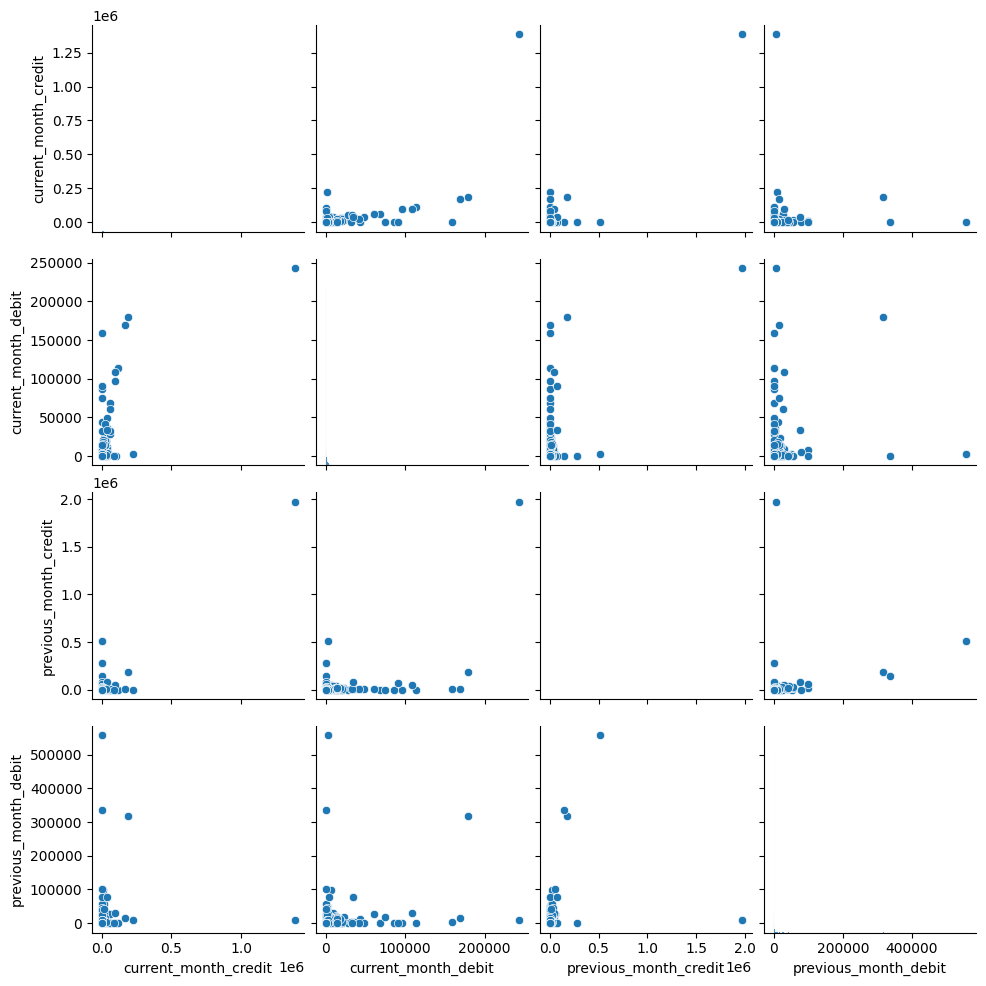

In [50]:
# scatter plot for a sample of transactional variables
plt.figure()
sns.pairplot(numerical[transactions].sample(1000))

**the scatter plot is is not meaningful due to the presence of outliers**

In [51]:
#taking log of every value to negate outliers
for column in var:
    mini=1
    if numerical[column].min()<0:
        mini =  abs(numerical[column].min()) + 1

    numerical[column] = [i+mini for i in numerical[column]]
    numerical[column] = numerical[column].map(lambda x : np.log(x))

<Figure size 896x672 with 0 Axes>

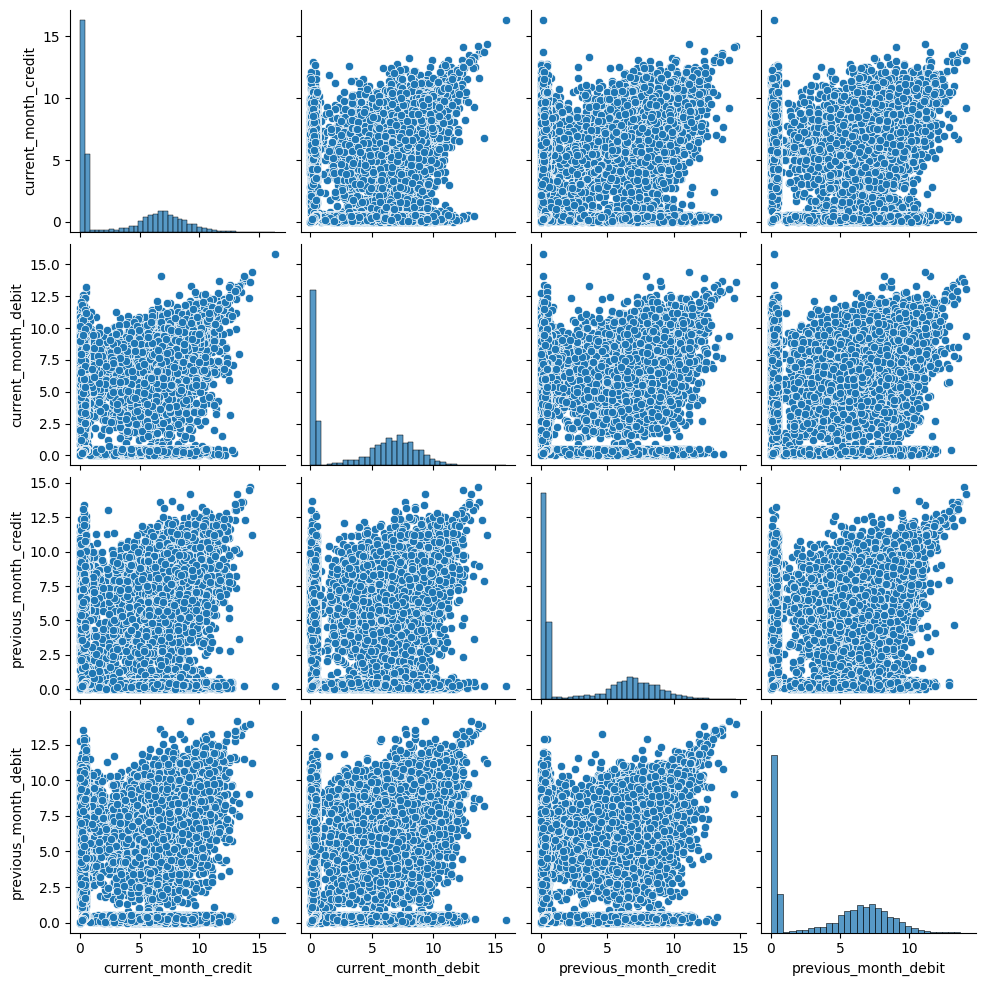

In [52]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

**Inferences**
1.    This validates the high correlation between the transaction variables.
2.    This high correlation can be used for feature engineering during the later stages.

<Figure size 896x672 with 0 Axes>

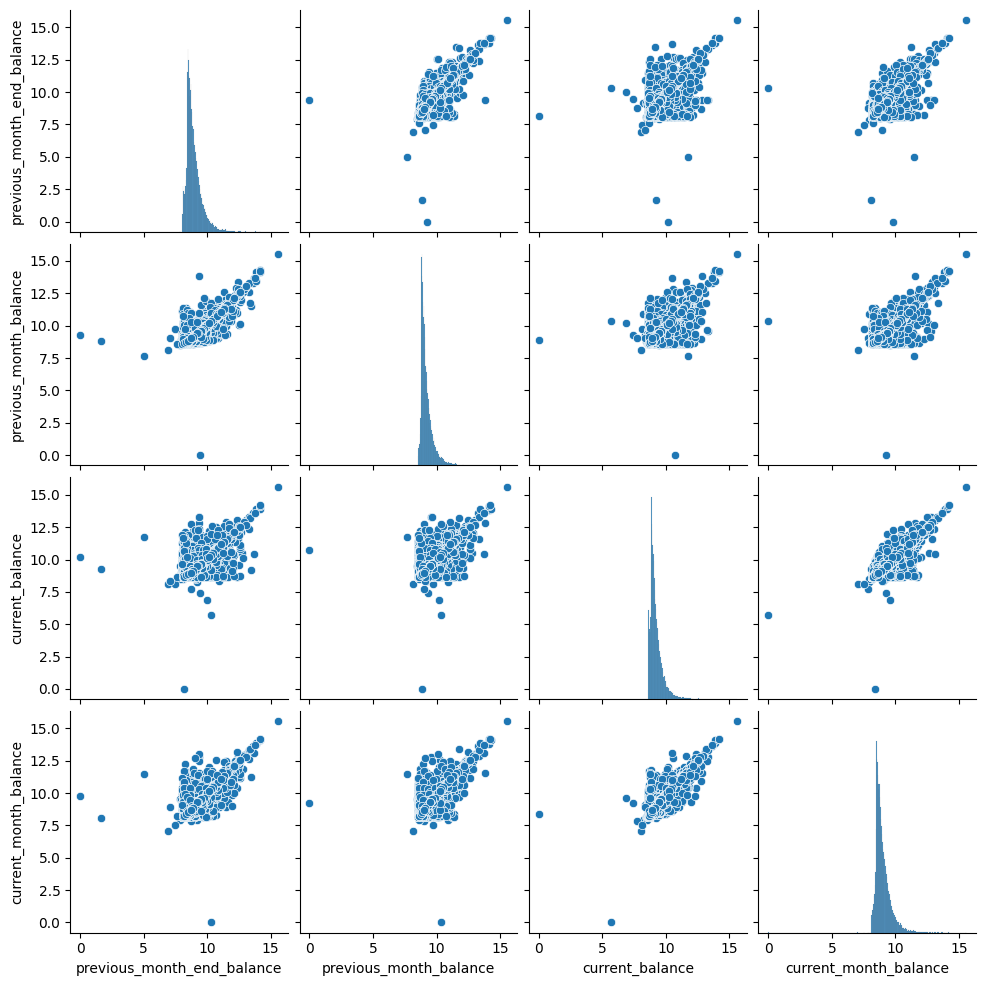

In [53]:
# balance variables
plt.figure(dpi=140)
sns.pairplot(numerical[balance])

**Inferences**
1.    This validates the high correlation between the balance variables.
2.    This high correlation can be used for feature engineering during the later stages.

<Axes: xlabel='average_monthly_balance_prevQ', ylabel='average_monthly_balance_prevQ2'>

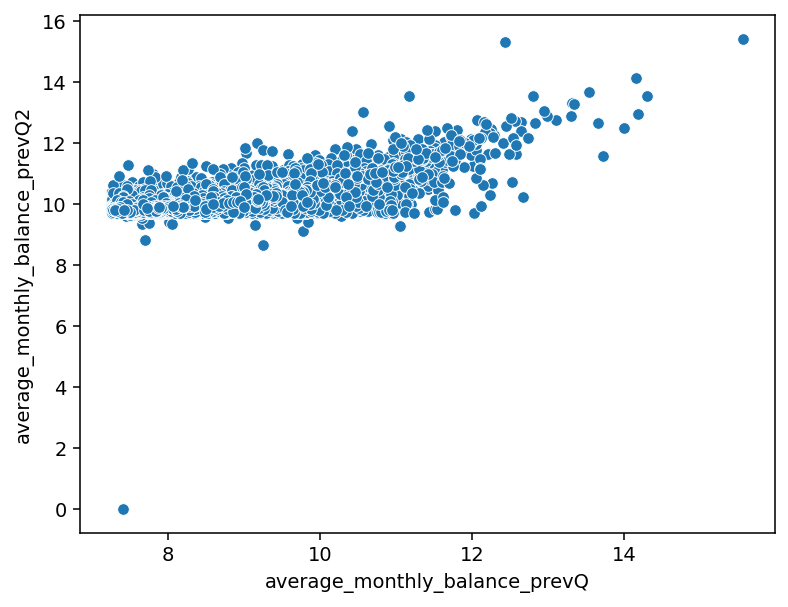

In [54]:
# previous quarters
plt.figure(dpi=140)
sns.scatterplot(x=numerical['average_monthly_balance_prevQ'], y=numerical['average_monthly_balance_prevQ2'])

**Inferences**
1.    This validates the high correlation between the two previous quarters
2.    This high correlation can be used for feature engineering during the later stages.

## Bivariate : Categorical-Categorical

#### List of Hypothesis to check under this combination
1.   Are females less likely to churn than males?
2.   Are young customers more likely to churn?
3.   Are customers in the lower income bracket more likely to churn?
4.   Are customers with dependent(s) less likely to churn?
5.   Customers with an average family size less than 4 are more likely to churn?
6.   Customers whose last transaction was more than 6 months ago, do they have higher churn rate?
7.   Possibility that cities and branch code with very few accounts may lead to churning.

**Missing Values** - finding behaviour

**Gender**:
  *  Do missing values churn more?

**Dependents**:
  *  Do missing values have any relation with churn?

**Occupation:**
   * Do they have some relation with churn?

In [55]:
d = data[['churn', 'gender']]

In [56]:
t = pd.crosstab(d['churn'], d['gender'])

In [57]:
t

gender,Female,Male
churn,,
0,9324,13379
1,1985,3169


In [58]:
from scipy.stats import chi2_contingency

In [59]:
chi2_contingency(t)

Chi2ContingencyResult(statistic=11.270738823296812, pvalue=0.0007873838498074115, dof=1, expected_freq=array([[ 9216.65028539, 13486.34971461],
       [ 2092.34971461,  3061.65028539]]))

crosstab method to count and normalize based on the index
https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [60]:
pd.crosstab(d['gender'], d['churn'], normalize='index')

churn,0,1
gender,,
Female,0.824476,0.175524
Male,0.808496,0.191504


In [61]:
data.isna().mean()*100

,0
customer_id,0.000000
vintage,0.000000
age,0.000000
gender,1.849764
dependents,8.678035
occupation,0.281869
city,2.829258
customer_nw_category,0.000000
branch_code,0.000000
current_balance,0.000000


In [62]:
data.dropna(subset=['gender'])

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,0.20,0.20,0.20,1458.71,1458.71,0,141.0,21.0,5.0,1.0
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,...,0.56,5486.27,100.56,6496.78,8787.61,0,305.0,44.0,11.0,4.0
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,0.61,6046.73,259.23,5006.28,5070.14,0,NaN,NaN,NaN,NaN
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,714.61,588.62,1538.06,1157.15,1677.16,1,307.0,44.0,11.0,6.0
5,7,1923,42,Female,0,self_employed,1096.0,2,1666,15202.20,...,0.36,857.50,286.07,15719.44,15349.75,0,305.0,44.0,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0,student,1020.0,2,1207,1076.43,...,0.30,0.30,0.30,1076.43,1076.43,0,295.0,43.0,10.0,1.0
28378,30298,1537,34,Female,0,self_employed,1046.0,2,223,3844.10,...,2.29,901.00,1014.07,3738.54,3690.32,0,351.0,51.0,12.0,1.0
28379,30299,2376,47,Male,0,salaried,1096.0,2,588,65511.97,...,3883.06,168.23,71.80,61078.50,57564.24,1,365.0,1.0,12.0,1.0
28380,30300,1745,50,Male,3,self_employed,1219.0,3,274,1625.55,...,0.20,0.20,0.20,1625.55,1625.55,0,NaN,NaN,NaN,NaN


In [63]:
def BVA_categorical_plot(data, tar, cat):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]

    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat])

    #performing chi2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(table)

    #checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False

    #plotting grouped plot
    sns.countplot(x=cat, hue=tar, data=data)
    plt.title(f"p-value = {round(p, 8)}\n difference significant? = {sig}\n")

    #plotting percent stacked bar plot
    ax1 = pd.crosstab(data[cat], data[tar], normalize='index')
    # ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack() old code
    ax1.plot(kind='bar', stacked='True',title=str(ax1))
    # int_level = data[cat].value_counts() old code

### 1. Are females less likely to churn than males?

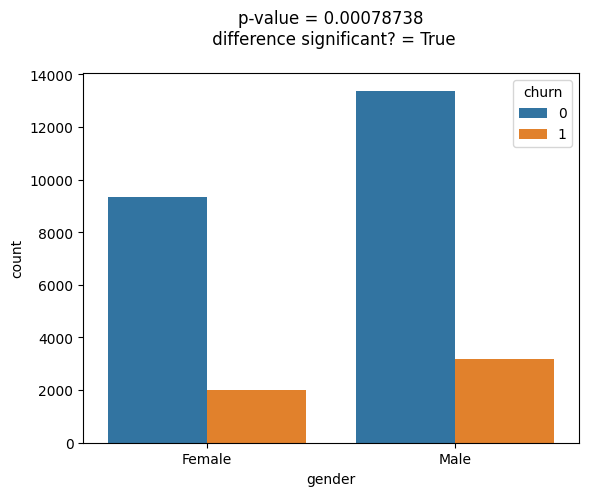

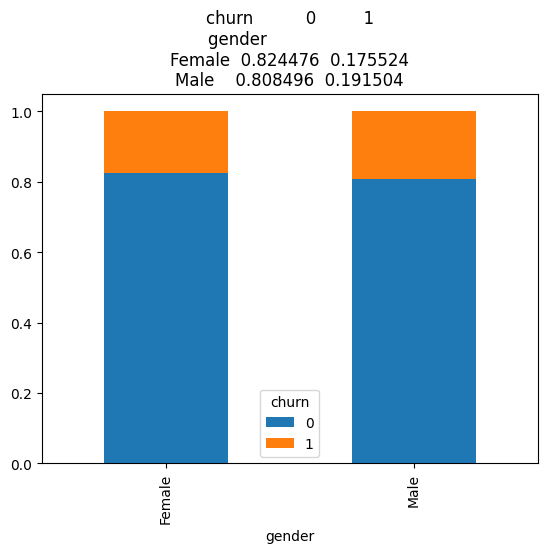

In [64]:
BVA_categorical_plot(data, 'churn', 'gender')

**Result:**

the difference between the males and females customer churning is significant.

### 2. Are young customers more likely to churn?

segregating customers into segments

In [65]:
churn = data[['churn', 'age']][:]

In [66]:
def age_group(x):
    if x >= 80:
        return 'very old'
    elif x < 80 & x >= 60:
        return 'senior citizen'
    elif x < 60 & x >= 18:
        return 'adult'
    else:
        return 'young'

In [68]:
churn['age_group'] = churn['age'].apply(lambda x: age_group(x))

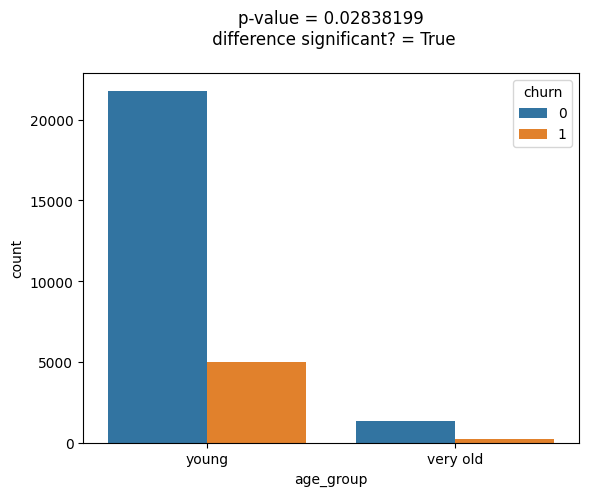

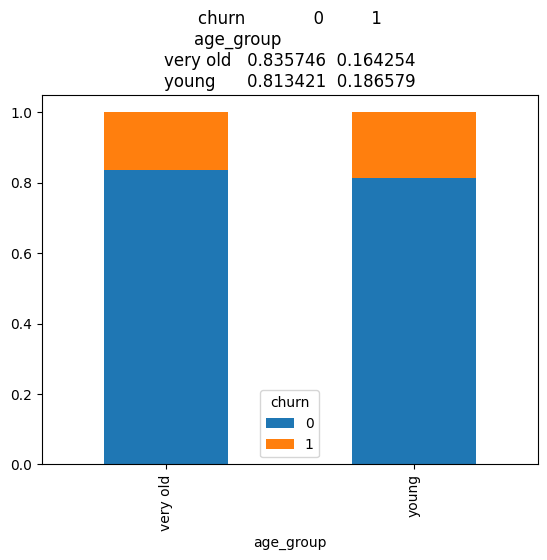

In [69]:
BVA_categorical_plot(churn, 'churn', 'age_group')

**Result**:
Age group has significant effect on the churning rate.

### 3. Customers from low income bracket more likely to churn

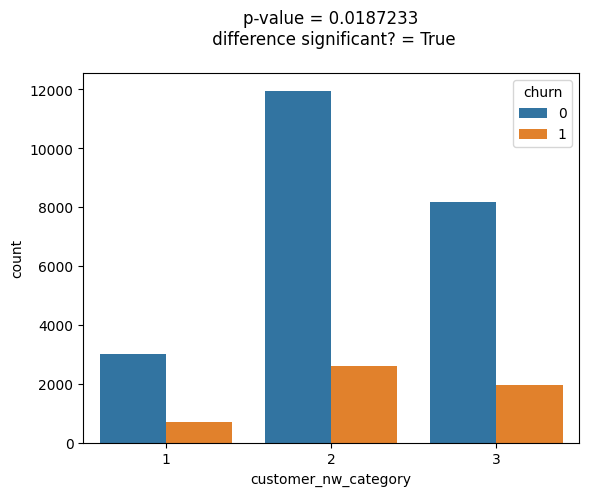

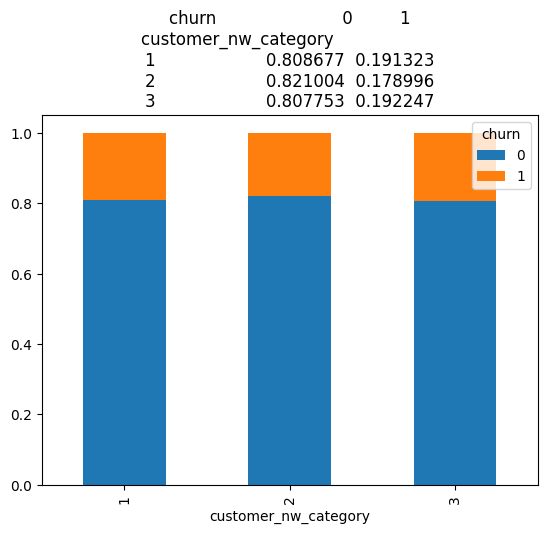

In [70]:
BVA_categorical_plot(data, 'churn', 'customer_nw_category')

**Result:**
Different income brackets have significant effect on the churn rate.

### 4,5. Are customers with dependent(s) less likely to churn?

segregating dependents into categories

In [71]:
dependents = data[['churn','dependents']][:]
dependents.dropna(inplace=True)

In [72]:
def family_group(x):
    if x == 0:
        return 'single'
    elif x >= 1 & x <= 3:
        return 'small family'
    elif x >= 4 & x <= 9:
        return 'large family'
    else:
        return 'joint family'

In [73]:
dependents['dep_group'] = dependents['dependents'].apply(lambda x: family_group(x))

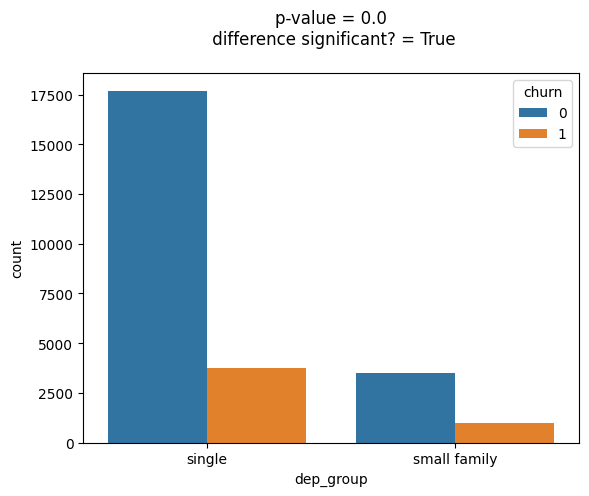

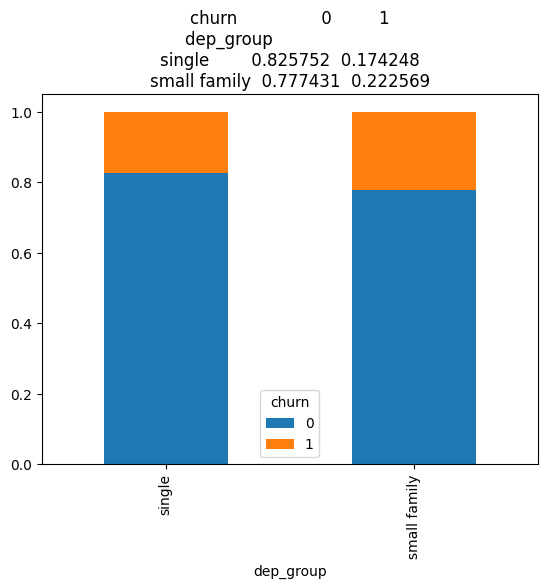

In [74]:
BVA_categorical_plot(dependents, 'churn', 'dep_group')

**Result:**

Number of dependents also play significant role in churning.

### 6. Customers whose last transaction was more than 6 months ago, they have a higher churn rate?

In [75]:
# segregating customers whose last transaction was more than 6 months ago
transaction = data[['churn','moy_ls_tran']][:]
transaction['moy_ls_tran'] = transaction['moy_ls_tran'].map(lambda x: 'more than 6 months ago' if x<7 else 'within 6 months')

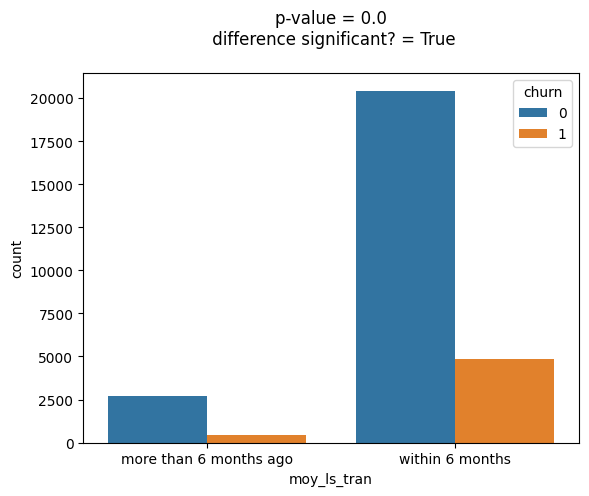

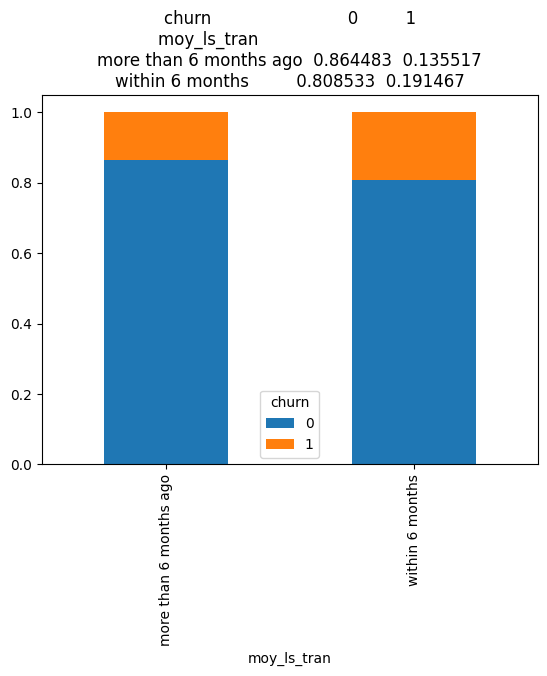

In [76]:
BVA_categorical_plot(transaction, 'churn', 'moy_ls_tran')

**Result**

there is a significant difference between the people who made their last transaction in last 6 months and the customers who had their last transaction more than 6 months ago.

### 7. Possibility that cities and branch code with very few accounts may lead to churning.

#### City

In [77]:
# getting city codes which have less than 280 (1%) of accounts
tmp = data['city'].value_counts()
cities = tmp[tmp<280].index

In [78]:
churn_acc = data[['churn','city']][:]
churn_acc['city_cat'] = None

In [79]:
churn_acc.loc[churn_acc['city'].isin(cities[:]), 'city_cat'] = 'low accounts'
churn_acc.loc[~churn_acc['city'].isin(cities[:]), 'city_cat'] = 'high accounts'

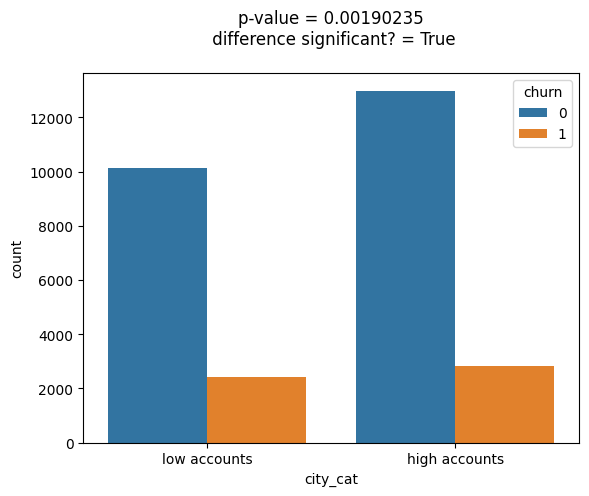

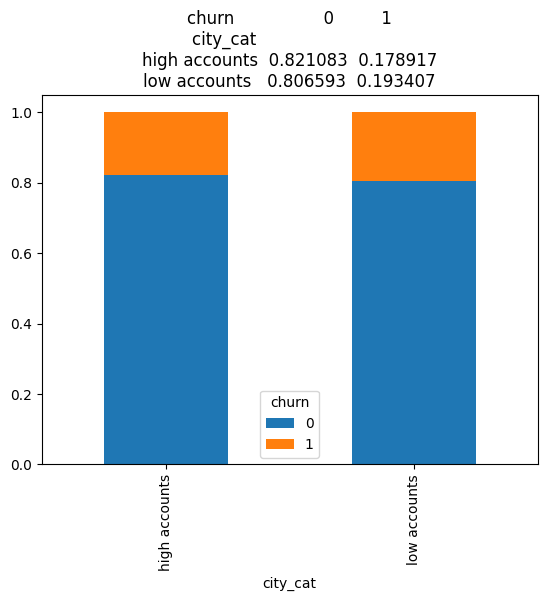

In [80]:
BVA_categorical_plot(churn_acc, 'churn', 'city_cat')

**Result**

cities having less than 1 percent of the total have significantly different churn rates as compared to the cities with more accounts.

#### branch_code

In [81]:
# getting branch codes with more than 0.5% of total accounts
tmp = data['branch_code'].value_counts()[:]
branch = tmp[tmp<140].index

In [82]:
# making two segments
churn_acc = data[['churn','branch_code']][:]
churn_acc['branch_cat'] = None

In [83]:
churn_acc.loc[churn_acc['branch_code'].isin(branch[:]), 'branch_cat'] = 'low accounts'
churn_acc.loc[~churn_acc['branch_code'].isin(branch[:]), 'branch_cat'] = 'high accounts'

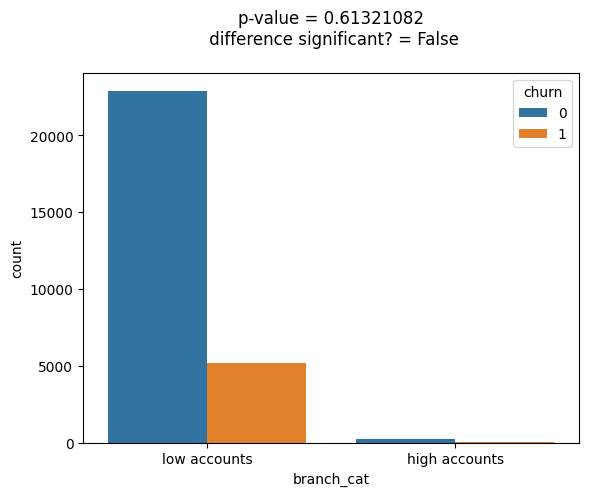

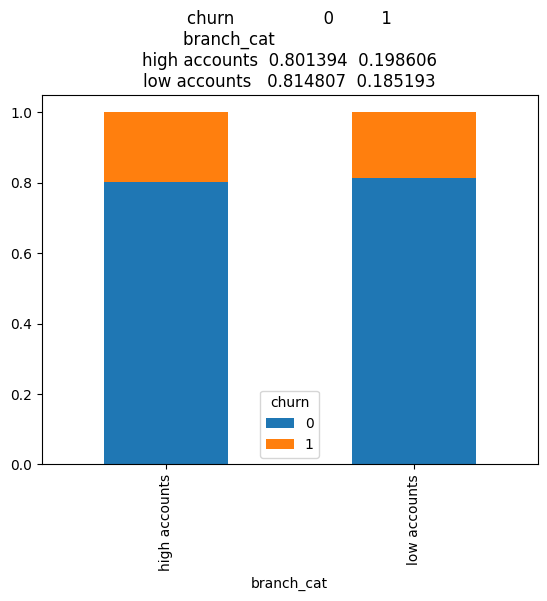

In [84]:
BVA_categorical_plot(churn_acc, 'churn', 'branch_cat')

**Resilt:**

There is no significant difference between the high account count branches and low account count branches.

### Missing Values: Gender

In [85]:
# isolating rows with missing gender
miss_gender = data[:]
miss_gender.loc[:, 'missing_gender'] = 'not_missing'
miss_gender.loc[~miss_gender['gender'].isin(['Male','Female']), 'missing_gender'] = 'missing value'

<ipython-input-85-35efd8dae19d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_gender.loc[:, 'missing_gender'] = 'not_missing'


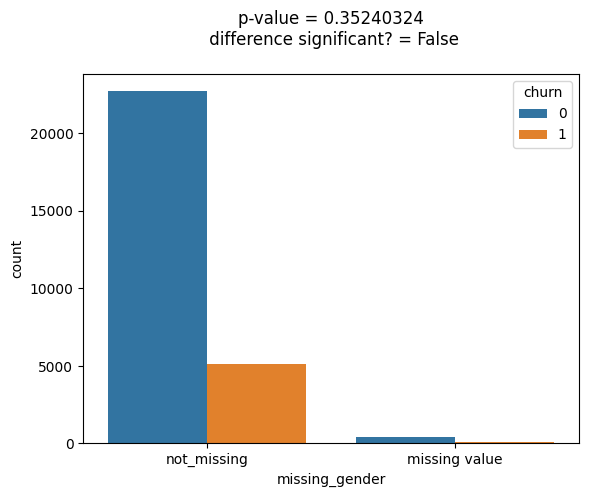

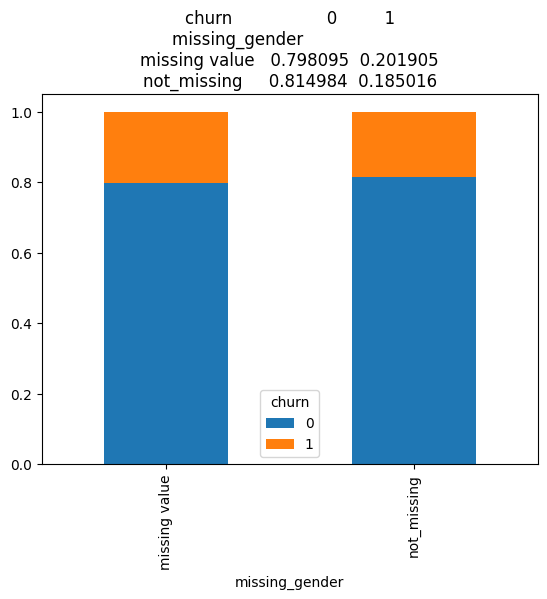

In [86]:
BVA_categorical_plot(miss_gender, 'churn', 'missing_gender')

**There is no diffrent behaviour of the missing values in gender wrt target**


### Missing values : Dependents

In [87]:
# isolating rows with missing gender
miss_dependents = data[:]
miss_dependents['missing_dependents'] = 'not_missing'
miss_dependents.loc[~miss_dependents['dependents'].isin([0, 2, 3, 1, 7, 4, 6, 5, 9, 52, 36,50,8,25,32]),
                                                                'missing_dependents'] = 'missing value'

<ipython-input-87-4a4b491a5e92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_dependents['missing_dependents'] = 'not_missing'


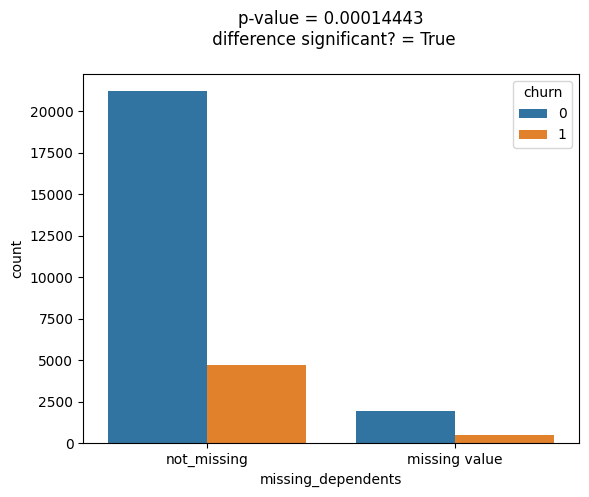

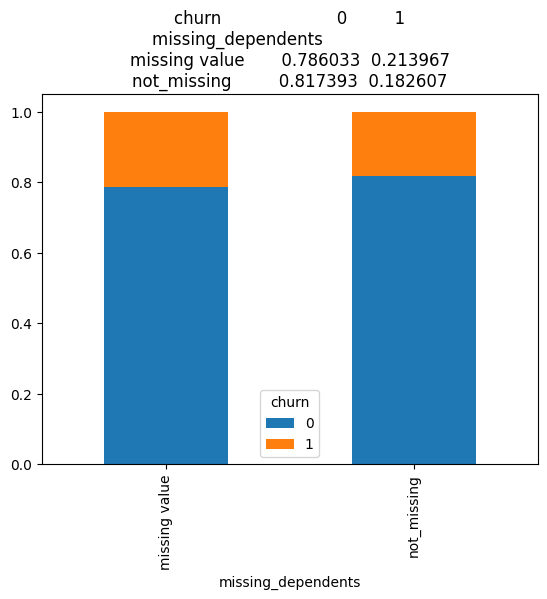

In [88]:
BVA_categorical_plot(miss_dependents, 'churn', 'missing_dependents')

Missing values in dependents have significantly different churning rate than the rest of the data.

### Missing values : Occupation

In [89]:
# isolating rows with missing gender
miss_occupation = data[:]
miss_occupation['missing_occupation'] = 'not_missing'
miss_occupation.loc[~miss_occupation['occupation'].isin(['self_employed', 'salaried', 'retired', 'student',
                                                    'company']), 'missing_occupation'] = 'missing value'

<ipython-input-89-3e1d1ade5a7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_occupation['missing_occupation'] = 'not_missing'


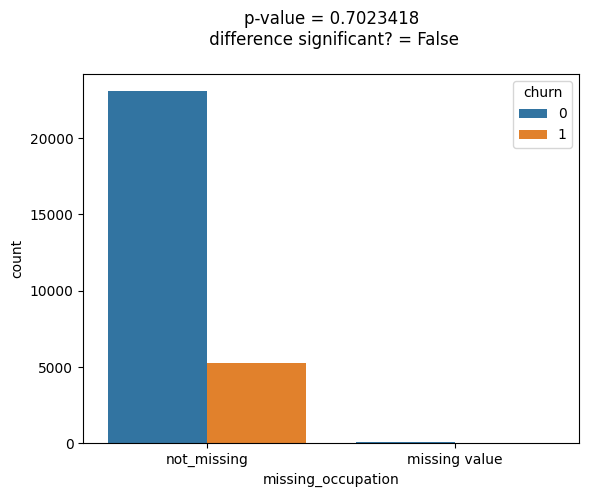

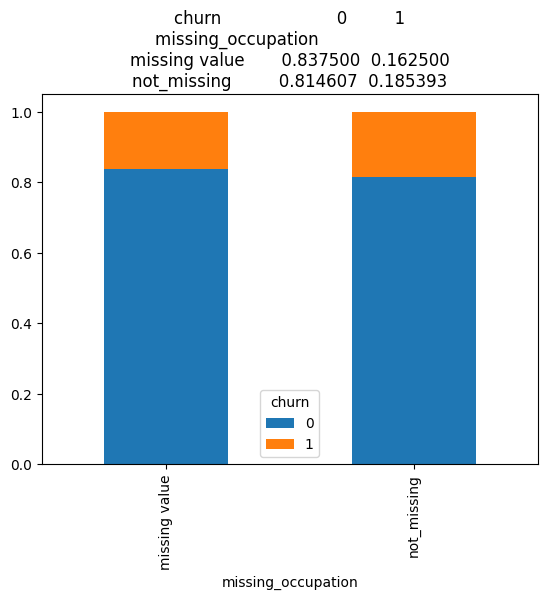

In [90]:
BVA_categorical_plot(miss_occupation, 'churn', 'missing_occupation')

**Missing values in occupation does not have any significantly different relation with churn rate.**